In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from datetime import datetime

In [2]:
df = pd.read_csv('Rose.csv')

In [3]:
df.head()

YearMonth   Rose
0   1980-01  112.0
1   1980-02  118.0
2   1980-03  129.0
3   1980-04   99.0
4   1980-05  116.0

In [4]:
df.tail()

YearMonth  Rose
182   1995-03  45.0
183   1995-04  52.0
184   1995-05  28.0
185   1995-06  40.0
186   1995-07  62.0

In [5]:
date = pd.date_range(start = '01/01/1980', end = '08/01/1995', freq = 'M')

In [6]:
df['Time_Stamp'] = pd.DataFrame(date)

In [7]:
df.head()

YearMonth   Rose Time_Stamp
0   1980-01  112.0 1980-01-31
1   1980-02  118.0 1980-02-29
2   1980-03  129.0 1980-03-31
3   1980-04   99.0 1980-04-30
4   1980-05  116.0 1980-05-31

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   YearMonth   187 non-null    object        
 1   Rose        185 non-null    float64       
 2   Time_Stamp  187 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 4.5+ KB


In [9]:
df = df.drop(['YearMonth'], axis = 1)

In [10]:
df = df.set_index(keys = 'Time_Stamp')

In [11]:
df.head()

Rose
Time_Stamp       
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0

In [12]:
df.describe()

Rose
count  185.000000
mean    90.394595
std     39.175344
min     28.000000
25%     63.000000
50%     86.000000
75%    112.000000
max    267.000000

In [13]:
anomalies = pd.isnull(df['Rose'])
df[anomalies]

Rose
Time_Stamp      
1994-07-31   NaN
1994-08-31   NaN

In [14]:
df = df.interpolate()

In [15]:
df.isnull().sum()

Rose    0
dtype: int64

In [16]:
df.isna().sum()

Rose    0
dtype: int64

In [17]:
df.notna().sum()

Rose    187
dtype: int64

In [18]:
df.shape

(187, 1)

### Plotting Time series data:

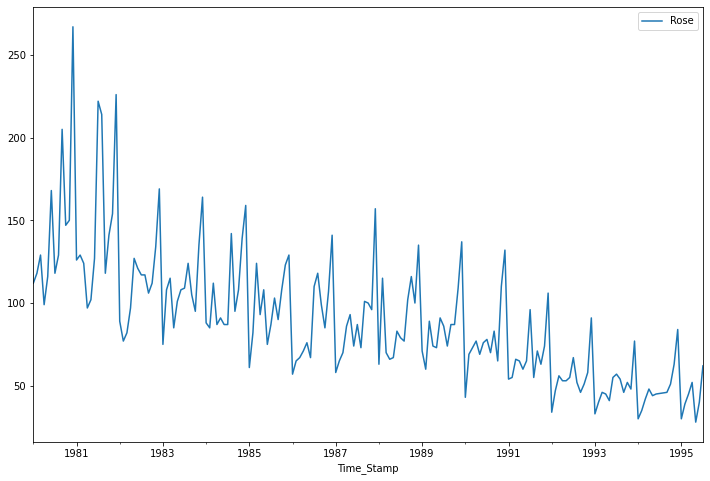

In [19]:
from pylab import rcParams
rcParams['figure.figsize'] = 12,8
df.plot()
plt.show()

### Plotting Time series data along with Mean and Median:

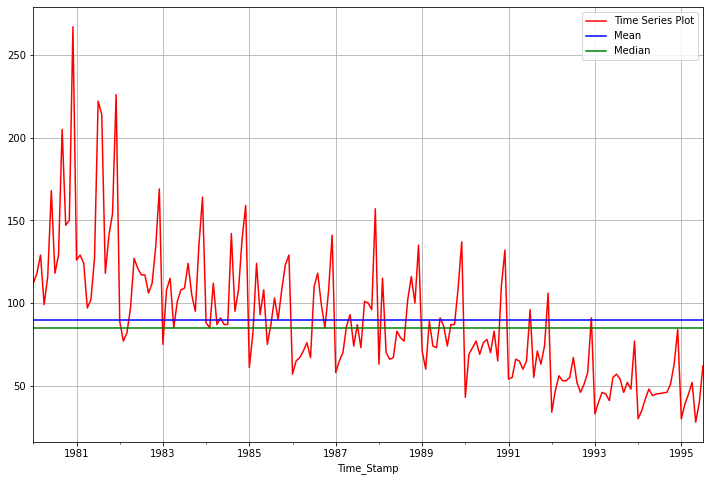

In [128]:
df.plot(color='Red')
plt.axhline(df['Rose'].mean(),color='Blue')
plt.axhline(df['Rose'].median(),color='Green')
plt.grid()
plt.legend(['Time Series Plot','Mean','Median']);

### Boxplot of Time series data:

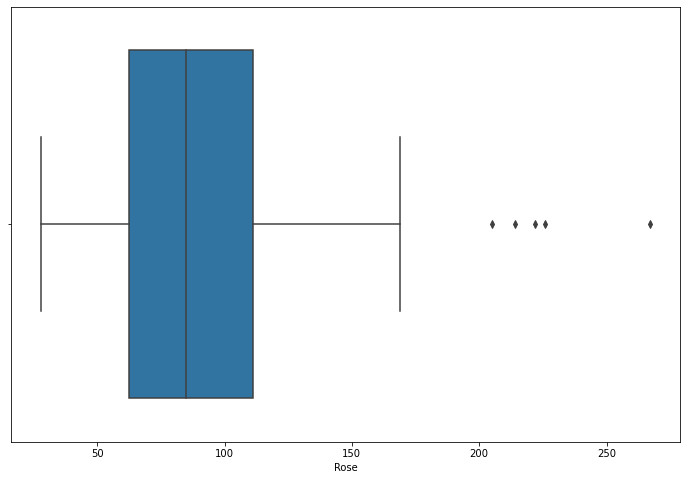

In [129]:
sns.boxplot(df['Rose'])

### Quarterly comparison of shipments using barplot:

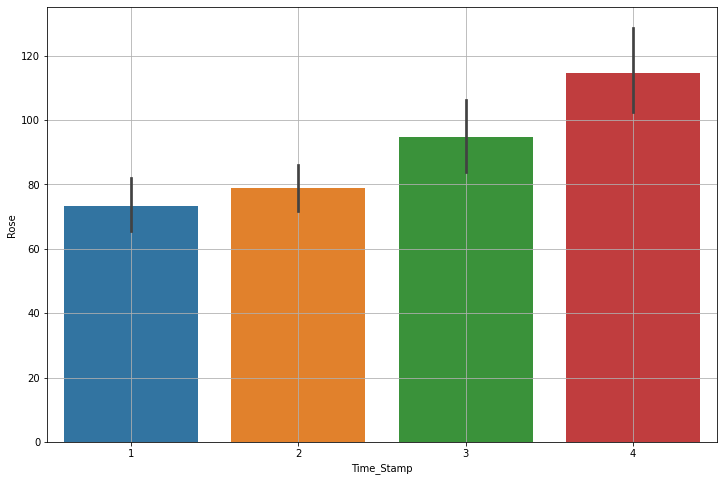

In [130]:
sns.barplot(df.index.quarter,df.Rose,data=df)
plt.grid();

### Monthly comparison of shipments using barplot:

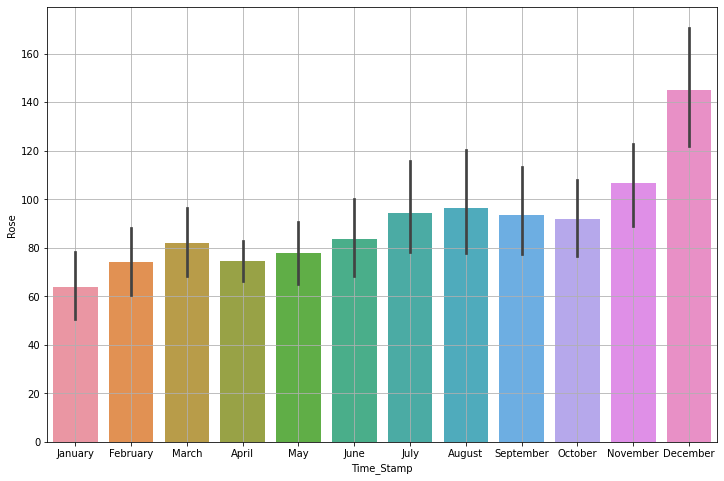

In [131]:
sns.barplot(df.index.month_name(),df.Rose,data=df)
plt.grid();

### Distribution plot for quarterly comparison of Rose wine sales:

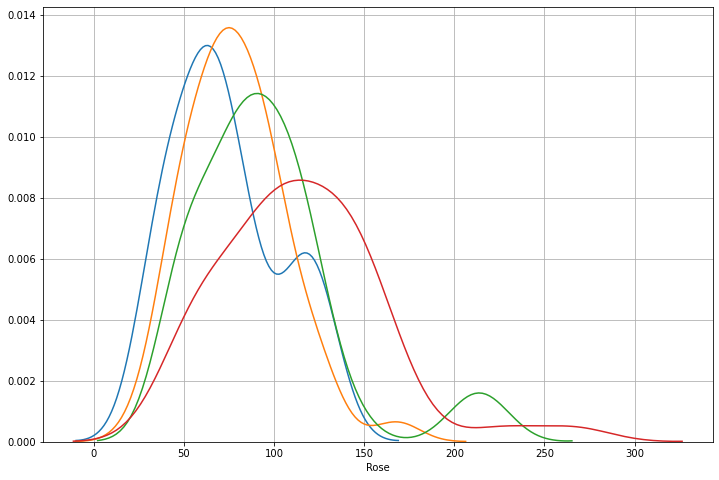

In [132]:
sns.distplot(df.loc[df.index.quarter == 1]['Rose'],hist = False)
sns.distplot(df.loc[df.index.quarter == 2]['Rose'],hist = False)
sns.distplot(df.loc[df.index.quarter == 3]['Rose'],hist = False)
sns.distplot(df.loc[df.index.quarter == 4]['Rose'],hist = False)
plt.grid();

### Monthly sales across years:

In [133]:
monthly_sales_across_years = pd.pivot_table(df, values = 'Rose', columns = df.index.month_name(), index = df.index.year)
monthly_sales_across_years

Time_Stamp  April      August  December  February  January        July   June  \
Time_Stamp                                                                      
1980         99.0  129.000000     267.0     118.0    112.0  118.000000  168.0   
1981         97.0  214.000000     226.0     129.0    126.0  222.000000  127.0   
1982         97.0  117.000000     169.0      77.0     89.0  117.000000  121.0   
1983         85.0  124.000000     164.0     108.0     75.0  109.000000  108.0   
1984         87.0  142.000000     159.0      85.0     88.0   87.000000   87.0   
1985         93.0  103.000000     129.0      82.0     61.0   87.000000   75.0   
1986         71.0  118.000000     141.0      65.0     57.0  110.000000   67.0   
1987         86.0   73.000000     157.0      65.0     58.0   87.000000   74.0   
1988         66.0   77.000000     135.0     115.0     63.0   79.000000   83.0   
1989         74.0   74.000000     137.0      60.0     71.0   86.000000   91.0   
1990         77.0   70.000000     132.0      69.0     43.0   78.000000   76.0   
1991         65.0   55.000000     106.0      55.0     54.0   96.000000   65.0   
1992         53.0   52.000000      91.0      47.0     34.0   67.000000   55.0   
1993         45.0   54.000000      77.0      40.0     33.0   57.000000   55.0   
1994         48.0   45.666667      84.0      35.0     30.0   45.333333   45.0   
1995         52.0         NaN       NaN      39.0     30.0   62.000000   40.0   

Time_Stamp  March    May  November  October  September  
Time_Stamp                                              
1980        129.0  116.0     150.0    147.0      205.0  
1981        124.0  102.0     154.0    141.0      118.0  
1982         82.0  127.0     134.0    112.0      106.0  
1983        115.0  101.0     135.0     95.0      105.0  
1984        112.0   91.0     139.0    108.0       95.0  
1985        124.0  108.0     123.0    108.0       90.0  
1986         67.0   76.0     107.0     85.0       99.0  
1987         70.0   93.0      96.0    100.0      101.0  
1988         70.0   67.0     100.0    116.0      102.0  
1989         89.0   73.0     109.0     87.0       87.0  
1990         73.0   69.0     110.0     65.0       83.0  
1991         66.0   60.0      74.0     63.0       71.0  
1992         56.0   53.0      58.0     51.0       46.0  
1993         46.0   41.0      48.0     52.0       46.0  
1994         42.0   44.0      63.0     51.0       46.0  
1995         45.0   28.0       NaN      NaN        NaN

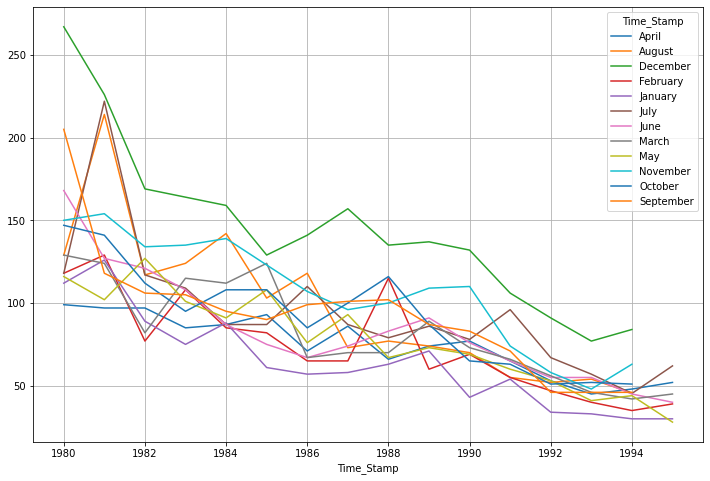

In [134]:
monthly_sales_across_years.plot()
plt.grid()

### Yearly sales across months:

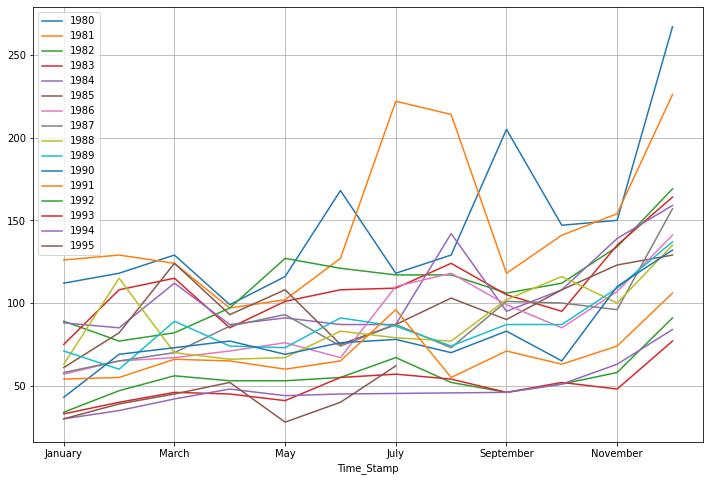

In [20]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October','November', 'December']
yearly_sales_across_years = pd.pivot_table(df, values = 'Rose', columns = df.index.year,index = df.index.month_name())
yearly_sales_across_years = yearly_sales_across_years.reindex(index = months)
yearly_sales_across_years.plot()
plt.grid()
plt.legend(loc='best');

In [21]:
yearly_sales_across_years

Time_Stamp   1980   1981   1982   1983   1984   1985   1986   1987   1988  \
Time_Stamp                                                                  
January     112.0  126.0   89.0   75.0   88.0   61.0   57.0   58.0   63.0   
February    118.0  129.0   77.0  108.0   85.0   82.0   65.0   65.0  115.0   
March       129.0  124.0   82.0  115.0  112.0  124.0   67.0   70.0   70.0   
April        99.0   97.0   97.0   85.0   87.0   93.0   71.0   86.0   66.0   
May         116.0  102.0  127.0  101.0   91.0  108.0   76.0   93.0   67.0   
June        168.0  127.0  121.0  108.0   87.0   75.0   67.0   74.0   83.0   
July        118.0  222.0  117.0  109.0   87.0   87.0  110.0   87.0   79.0   
August      129.0  214.0  117.0  124.0  142.0  103.0  118.0   73.0   77.0   
September   205.0  118.0  106.0  105.0   95.0   90.0   99.0  101.0  102.0   
October     147.0  141.0  112.0   95.0  108.0  108.0   85.0  100.0  116.0   
November    150.0  154.0  134.0  135.0  139.0  123.0  107.0   96.0  100.0   
December    267.0  226.0  169.0  164.0  159.0  129.0  141.0  157.0  135.0   

Time_Stamp   1989   1990   1991  1992  1993       1994  1995  
Time_Stamp                                                    
January      71.0   43.0   54.0  34.0  33.0  30.000000  30.0  
February     60.0   69.0   55.0  47.0  40.0  35.000000  39.0  
March        89.0   73.0   66.0  56.0  46.0  42.000000  45.0  
April        74.0   77.0   65.0  53.0  45.0  48.000000  52.0  
May          73.0   69.0   60.0  53.0  41.0  44.000000  28.0  
June         91.0   76.0   65.0  55.0  55.0  45.000000  40.0  
July         86.0   78.0   96.0  67.0  57.0  45.333333  62.0  
August       74.0   70.0   55.0  52.0  54.0  45.666667   NaN  
September    87.0   83.0   71.0  46.0  46.0  46.000000   NaN  
October      87.0   65.0   63.0  51.0  52.0  51.000000   NaN  
November    109.0  110.0   74.0  58.0  48.0  63.000000   NaN  
December    137.0  132.0  106.0  91.0  77.0  84.000000   NaN

### Plot ECDF: Empirical Cumulative Distribution Function:

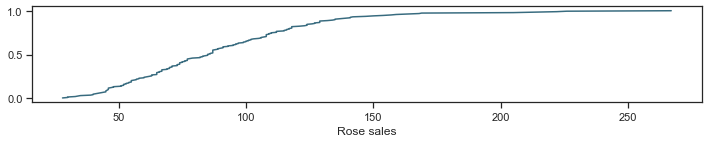

In [136]:
#ECDF - Adds up the number of observations that are there for a certain value.
from statsmodels.distributions.empirical_distribution import ECDF

sns.set(style = "ticks")# to format into seaborn 
c = '#386B7F' # basic color for plots
plt.figure(figsize = (12, 6))

  
plt.subplot(312)
cdf = ECDF(df['Rose'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = c)
plt.xlabel('Rose sales');

### Average sales and percentage change:

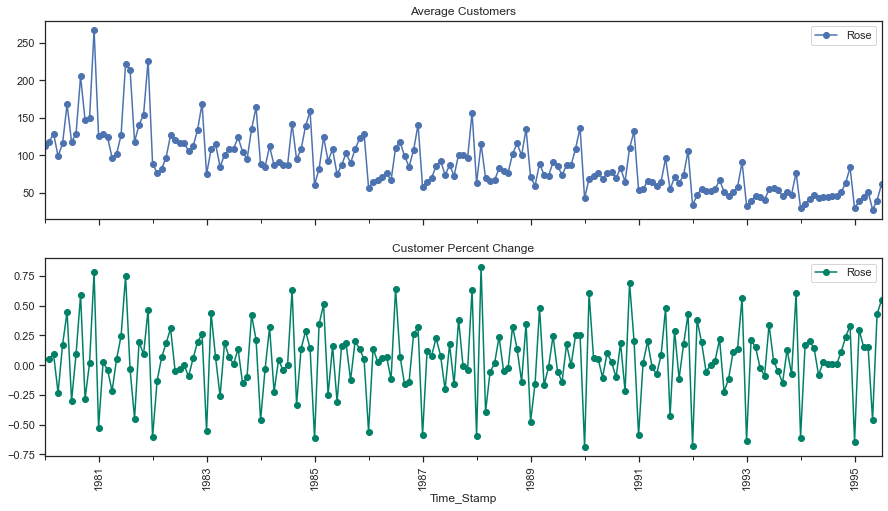

In [137]:
# group by date and get average Customers, and precent change
average_customers    = df.groupby('Time_Stamp')["Rose"].mean()
pct_change_customers = df.groupby('Time_Stamp')["Rose"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average Customers over time(year-month)
ax1 = average_customers.plot(legend=True,ax=axis1,marker='o',title="Average Customers")
ax1.set_xticks(range(len(average_customers)))
ax1.set_xticklabels(average_customers.index.tolist(), rotation=90)
# plot precent change for Customers over time(year-month)
ax2 = pct_change_customers.plot(legend=True,ax=axis2,marker='o',rot=90,colormap="summer",title="Customer Percent Change")

### Decomposition of Time Series:

### Additive decomposition:

In [138]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [139]:
df_add_decompose = seasonal_decompose(df['Rose'],model = 'additive')

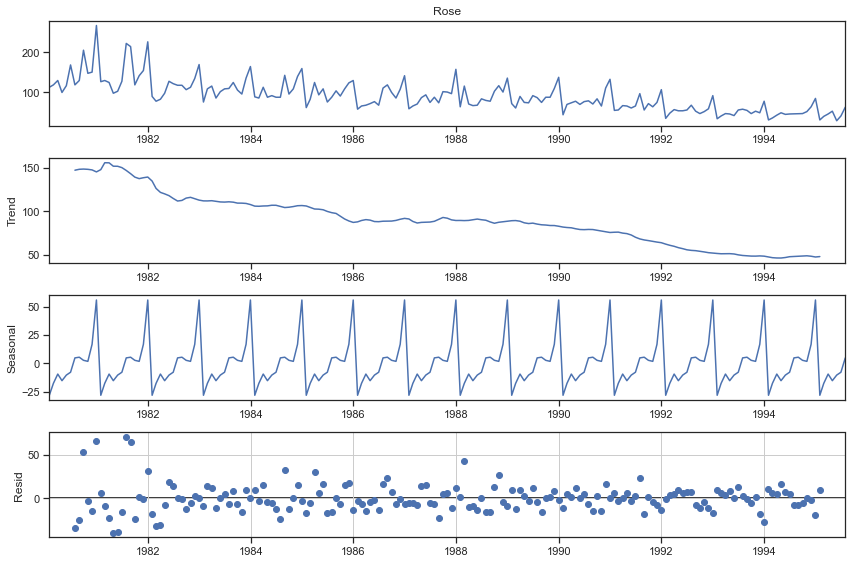

In [140]:
df_add_decompose.plot()
plt.grid()

In [141]:
trend = df_add_decompose.trend
seasonality = df_add_decompose.seasonal
residual = df_add_decompose.resid

In [142]:
print('Trend','\n',trend,'\n')
print('Seasonality','\n',seasonality,'\n')
print('Residual','\n',residual,'\n')

Trend 
 Time_Stamp
1980-01-31   NaN
1980-02-29   NaN
1980-03-31   NaN
1980-04-30   NaN
1980-05-31   NaN
              ..
1995-03-31   NaN
1995-04-30   NaN
1995-05-31   NaN
1995-06-30   NaN
1995-07-31   NaN
Name: trend, Length: 187, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31   -27.908647
1980-02-29   -17.435632
1980-03-31    -9.285830
1980-04-30   -15.098330
1980-05-31   -10.196544
                ...    
1995-03-31    -9.285830
1995-04-30   -15.098330
1995-05-31   -10.196544
1995-06-30    -7.678687
1995-07-31     4.896908
Name: seasonal, Length: 187, dtype: float64 

Residual 
 Time_Stamp
1980-01-31   NaN
1980-02-29   NaN
1980-03-31   NaN
1980-04-30   NaN
1980-05-31   NaN
              ..
1995-03-31   NaN
1995-04-30   NaN
1995-05-31   NaN
1995-06-30   NaN
1995-07-31   NaN
Name: resid, Length: 187, dtype: float64 



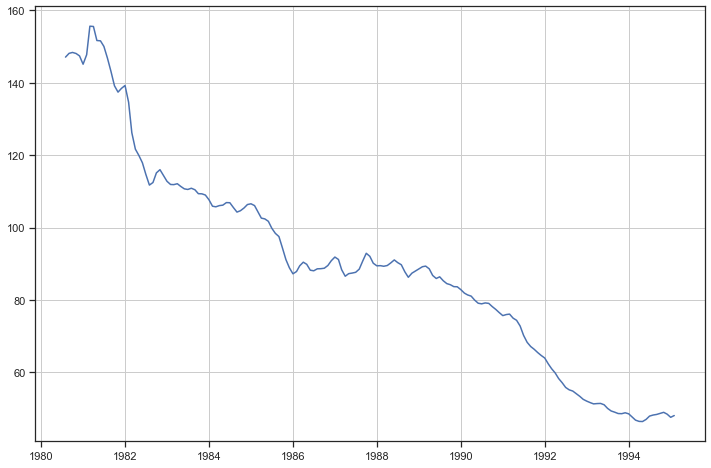

In [143]:
plt.plot(trend)
plt.grid();

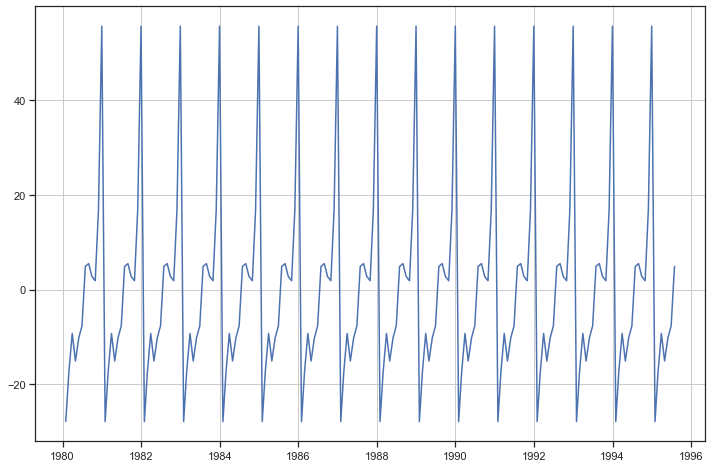

In [144]:
plt.plot(seasonality)
plt.grid();

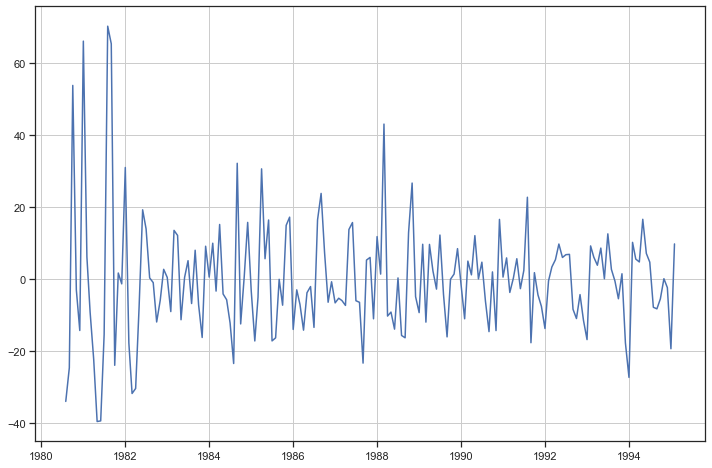

In [145]:
plt.plot(residual)
plt.grid();

In [146]:
df.head()

Rose
Time_Stamp       
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0

### Multiplicative decomposition:

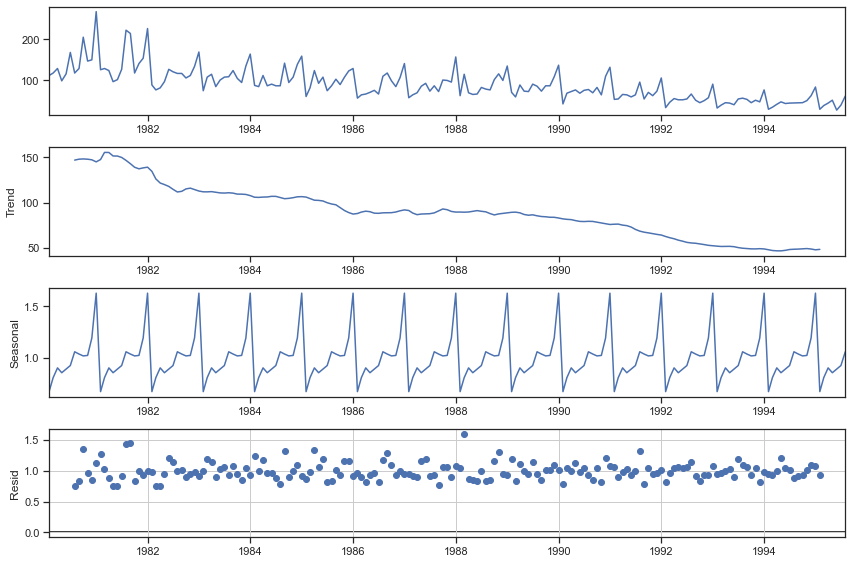

In [147]:
df_mul_decompose = seasonal_decompose(df,model = 'multiplicative')
df_mul_decompose.plot()
plt.grid();

In [148]:
trend = df_mul_decompose.trend
seasonality = df_mul_decompose.seasonal
residual = df_mul_decompose.resid

In [149]:
print('Trend','\n',trend,'\n')
print('Seasonality','\n',seasonality,'\n')
print('Residual','\n',residual,'\n')

Trend 
 Time_Stamp
1980-01-31   NaN
1980-02-29   NaN
1980-03-31   NaN
1980-04-30   NaN
1980-05-31   NaN
              ..
1995-03-31   NaN
1995-04-30   NaN
1995-05-31   NaN
1995-06-30   NaN
1995-07-31   NaN
Name: trend, Length: 187, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    0.670111
1980-02-29    0.806163
1980-03-31    0.901164
1980-04-30    0.854024
1980-05-31    0.889415
                ...   
1995-03-31    0.901164
1995-04-30    0.854024
1995-05-31    0.889415
1995-06-30    0.923985
1995-07-31    1.058038
Name: seasonal, Length: 187, dtype: float64 

Residual 
 Time_Stamp
1980-01-31   NaN
1980-02-29   NaN
1980-03-31   NaN
1980-04-30   NaN
1980-05-31   NaN
              ..
1995-03-31   NaN
1995-04-30   NaN
1995-05-31   NaN
1995-06-30   NaN
1995-07-31   NaN
Name: resid, Length: 187, dtype: float64 



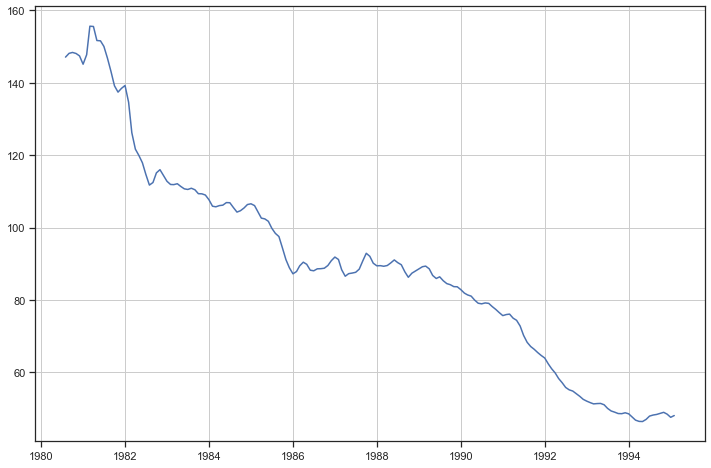

In [150]:
plt.plot(trend)
plt.grid();

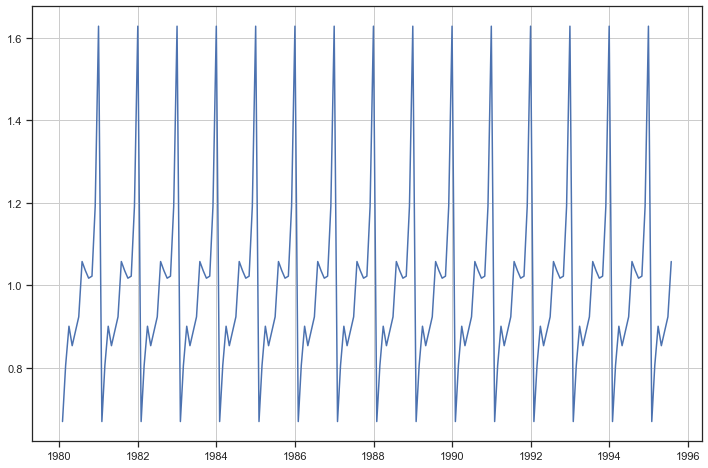

In [151]:
plt.plot(seasonality)
plt.grid();

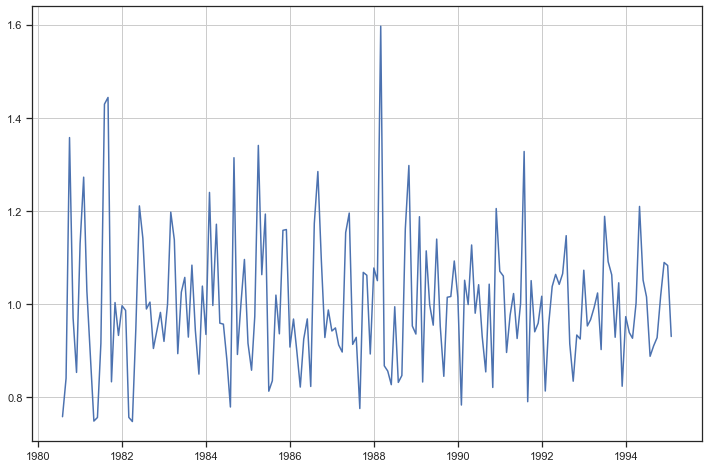

In [152]:
plt.plot(residual)
plt.grid();

Because the seasonality is constant over time, we choose the additive seasonality over the multilplicative model:

### Splitting the data into train and test:

In [153]:
train = df[df.index.year < 1991]
test = df[df.index.year >= 1991]

In [154]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


In [155]:
print('First few rows of Training Data','\n',train.head(),'\n')
print('Last few rows of Training Data','\n',train.tail(),'\n')
print('First few rows of Test Data','\n',test.head(),'\n')
print('Last few rows of Test Data','\n',test.tail(),'\n')

First few rows of Training Data 
              Rose
Time_Stamp       
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0 

Last few rows of Training Data 
              Rose
Time_Stamp       
1990-08-31   70.0
1990-09-30   83.0
1990-10-31   65.0
1990-11-30  110.0
1990-12-31  132.0 

First few rows of Test Data 
             Rose
Time_Stamp      
1991-01-31  54.0
1991-02-28  55.0
1991-03-31  66.0
1991-04-30  65.0
1991-05-31  60.0 

Last few rows of Test Data 
             Rose
Time_Stamp      
1995-03-31  45.0
1995-04-30  52.0
1995-05-31  28.0
1995-06-30  40.0
1995-07-31  62.0 



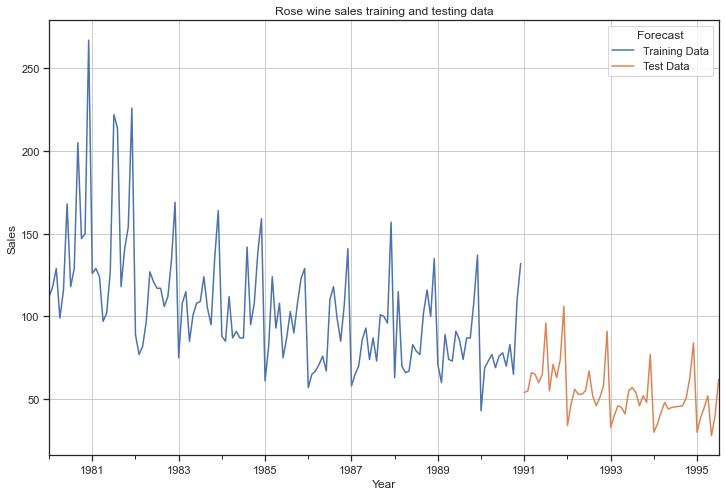

In [156]:
train['Rose'].plot()
test['Rose'].plot()
plt.grid()
plt.title('Rose wine sales training and testing data')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.legend(['Training Data','Test Data'],title='Forecast');

### Simple Exponential Smoothing model:

In [157]:
import statsmodels.tools.eval_measures as      em
from   sklearn.metrics                 import  mean_squared_error
from   statsmodels.tsa.api             import ExponentialSmoothing, SimpleExpSmoothing, Holt
from   IPython.display                 import display

In [158]:
model_SES = SimpleExpSmoothing(train)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


In [159]:
# Fitting the Simple Exponential Smoothing model and asking python to choose the optimal parameters

model_SES_autofit = model_SES.fit(optimized=True)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [160]:
## Let us check the parameters

model_SES_autofit.params

{'smoothing_level': 0.09875015797045478,
 'smoothing_slope': nan,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 134.38706779531196,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [161]:
# Using the fitted model on the training set to forecast on the test set:

SES_predict = model_SES_autofit.forecast(steps=len(test))
SES_predict

1991-01-31    87.105006
1991-02-28    87.105006
1991-03-31    87.105006
1991-04-30    87.105006
1991-05-31    87.105006
1991-06-30    87.105006
1991-07-31    87.105006
1991-08-31    87.105006
1991-09-30    87.105006
1991-10-31    87.105006
1991-11-30    87.105006
1991-12-31    87.105006
1992-01-31    87.105006
1992-02-29    87.105006
1992-03-31    87.105006
1992-04-30    87.105006
1992-05-31    87.105006
1992-06-30    87.105006
1992-07-31    87.105006
1992-08-31    87.105006
1992-09-30    87.105006
1992-10-31    87.105006
1992-11-30    87.105006
1992-12-31    87.105006
1993-01-31    87.105006
1993-02-28    87.105006
1993-03-31    87.105006
1993-04-30    87.105006
1993-05-31    87.105006
1993-06-30    87.105006
1993-07-31    87.105006
1993-08-31    87.105006
1993-09-30    87.105006
1993-10-31    87.105006
1993-11-30    87.105006
1993-12-31    87.105006
1994-01-31    87.105006
1994-02-28    87.105006
1994-03-31    87.105006
1994-04-30    87.105006
1994-05-31    87.105006
1994-06-30    87

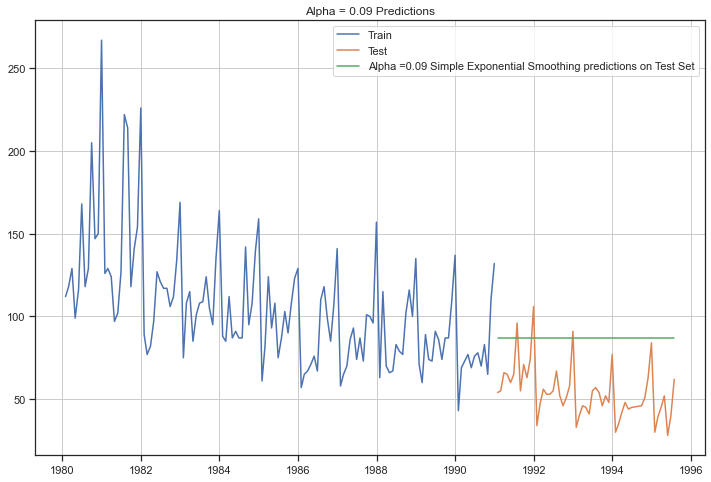

In [162]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha =0.09 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.09 Predictions');

### Report model accuracy

In [163]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [164]:
print('SES RMSE:',mean_squared_error(test.values,SES_predict.values,squared=False))
#different way to calculate RMSE
print('SES RMSE (calculated using statsmodels):',em.rmse(test.values,SES_predict.values)[0])

SES RMSE: 36.796248584641646
SES RMSE (calculated using statsmodels): 36.796248584641646


In [165]:
resultsDf1 = pd.DataFrame({'Test RMSE': [em.rmse(test.values,SES_predict.values)[0]]},index=['Alpha=0.09,SES'])
resultsDf1

Test RMSE
Alpha=0.09,SES  36.796249

### Double Exponential Smoothing - Holt's linear method with additive errors

In [166]:
# Initializing the Double Exponential Smoothing Model
model_DES = Holt(train)
# Fitting the model
model_DES = model_DES.fit()

print('')
print('==Holt model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_DES.params)


==Holt model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.15789473684210525, 'smoothing_slope': 0.15789473684210525, 'smoothing_seasonal': nan, 'damping_slope': nan, 'initial_level': 112.0, 'initial_slope': 6.0, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",


In [167]:
# Forecasting using this model for the duration of the test set
DES_predict =  model_DES.forecast(len(test))
DES_predict

1991-01-31     86.863579
1991-02-28     88.028056
1991-03-31     89.192534
1991-04-30     90.357011
1991-05-31     91.521488
1991-06-30     92.685966
1991-07-31     93.850443
1991-08-31     95.014921
1991-09-30     96.179398
1991-10-31     97.343876
1991-11-30     98.508353
1991-12-31     99.672831
1992-01-31    100.837308
1992-02-29    102.001785
1992-03-31    103.166263
1992-04-30    104.330740
1992-05-31    105.495218
1992-06-30    106.659695
1992-07-31    107.824173
1992-08-31    108.988650
1992-09-30    110.153127
1992-10-31    111.317605
1992-11-30    112.482082
1992-12-31    113.646560
1993-01-31    114.811037
1993-02-28    115.975515
1993-03-31    117.139992
1993-04-30    118.304469
1993-05-31    119.468947
1993-06-30    120.633424
1993-07-31    121.797902
1993-08-31    122.962379
1993-09-30    124.126857
1993-10-31    125.291334
1993-11-30    126.455811
1993-12-31    127.620289
1994-01-31    128.784766
1994-02-28    129.949244
1994-03-31    131.113721
1994-04-30    132.278199


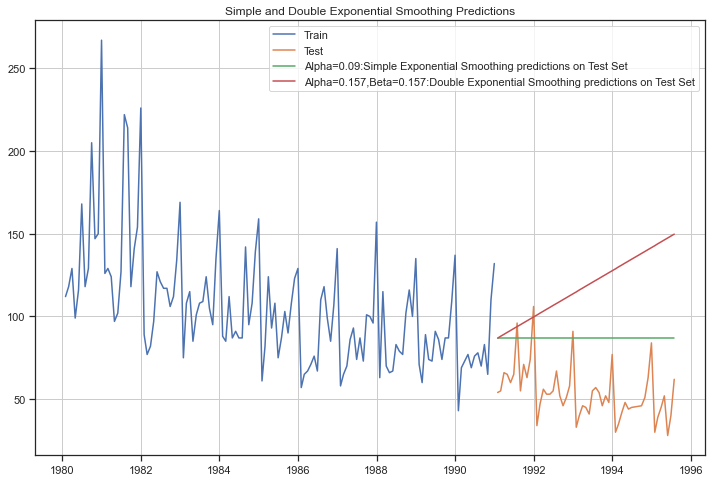

In [168]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=0.09:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.157,Beta=0.157:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions');

We see that the double exponential smoothing is picking up the trend component along with the level component as well.

### Report model accuracy

In [169]:
print('DES RMSE:',mean_squared_error(test.values,DES_predict.values,squared=False))

DES RMSE: 70.57245196981661


In [170]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,DES_predict.values,squared=False)]}
                           ,index=['Alpha=0.157,Beta=0.157:DES'])

resultsDf2 = pd.concat([resultsDf1, resultsDf_temp])
resultsDf2

Test RMSE
Alpha=0.09,SES              36.796249
Alpha=0.157,Beta=0.157:DES  70.572452

### Triple Exponential Smoothing model or Holt Winter's linear method:

### ETS(A, A, A) : With additive trend and seasonality:

In [171]:
# Initializing the Double Exponential Smoothing Model
model_TES = ExponentialSmoothing(train,trend='additive',seasonal='additive')
# Fitting the model
model_TES = model_TES.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.1334717093733897, 'smoothing_slope': 0.01378815923547723, 'smoothing_seasonal': 0.0, 'damping_slope': nan, 'initial_level': 76.39925606664771, 'initial_slope': 0.0, 'initial_seasons': array([ 38.68659359,  51.01769551,  58.98976874,  48.32071621,
        57.11421092,  62.54665394,  72.43745598,  78.50860338,
        74.47507263,  72.54246732,  90.61222176, 132.87443171]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [172]:
# Forecasting using this model for the duration of the test set
TES_predict =  model_TES.forecast(len(test))
TES_predict

1991-01-31     44.131124
1991-02-28     56.066790
1991-03-31     63.643427
1991-04-30     52.578938
1991-05-31     60.976997
1991-06-30     66.014003
1991-07-31     75.509369
1991-08-31     81.185080
1991-09-30     76.756113
1991-10-31     74.428072
1991-11-30     92.102390
1991-12-31    133.969164
1992-01-31     39.385890
1992-02-29     51.321555
1992-03-31     58.898192
1992-04-30     47.833704
1992-05-31     56.231762
1992-06-30     61.268769
1992-07-31     70.764135
1992-08-31     76.439846
1992-09-30     72.010879
1992-10-31     69.682838
1992-11-30     87.357156
1992-12-31    129.223930
1993-01-31     34.640655
1993-02-28     46.576321
1993-03-31     54.152958
1993-04-30     43.088469
1993-05-31     51.486528
1993-06-30     56.523535
1993-07-31     66.018901
1993-08-31     71.694612
1993-09-30     67.265645
1993-10-31     64.937603
1993-11-30     82.611922
1993-12-31    124.478695
1994-01-31     29.895421
1994-02-28     41.831087
1994-03-31     49.407724
1994-04-30     38.343235


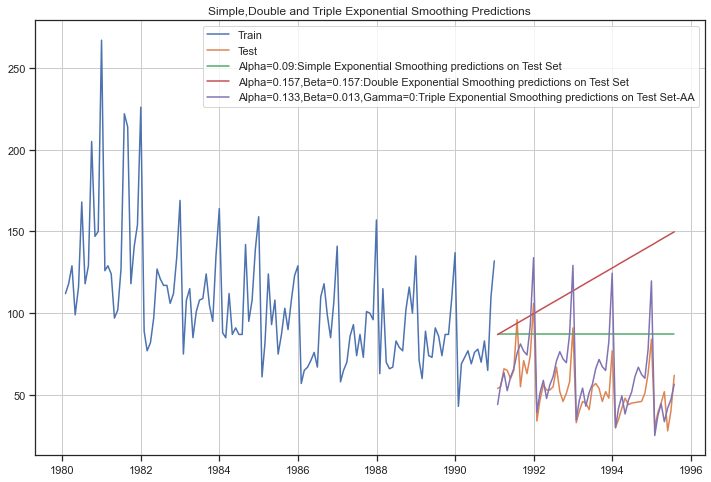

In [173]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=0.09:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.157,Beta=0.157:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.133,Beta=0.013,Gamma=0:Triple Exponential Smoothing predictions on Test Set-AA')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

We see that the Triple Exponential Smoothing is picking up the seasonal component as well.

### Report model accuracy

In [174]:
print('TES RMSE:',mean_squared_error(test.values,TES_predict.values,squared=False))

TES RMSE: 16.447473607004927


In [175]:
resultsDf_temp1 = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict.values,squared=False)]}
                           ,index=['Alpha=0.133,Beta=0.013,Gamma=0:TES - AA'])

resultsDf3 = pd.concat([resultsDf2, resultsDf_temp1])
resultsDf3

Test RMSE
Alpha=0.09,SES                           36.796249
Alpha=0.157,Beta=0.157:DES               70.572452
Alpha=0.133,Beta=0.013,Gamma=0:TES - AA  16.447474

### ETS(A, A, M) model : Additive trend and multiplicative seasonality

In [176]:
# Initializing the Double Exponential Smoothing Model
model_TES_am = ExponentialSmoothing(train,trend='add',seasonal='multiplicative')
# Fitting the model
model_TES_am = model_TES_am.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.10609637565452212, 'smoothing_slope': 0.04843844117216271, 'smoothing_seasonal': 0.0, 'damping_slope': nan, 'initial_level': 76.65565133724536, 'initial_slope': 0.0, 'initial_seasons': array([1.47550223, 1.65927089, 1.80572587, 1.58888771, 1.77822653,
       1.92604305, 2.11649389, 2.25135133, 2.11690513, 2.08112758,
       2.40927203, 3.30448015]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [177]:
# Forecasting using this model for the duration of the test set
TES_predict_am =  model_TES_am.forecast(len(test))
TES_predict_am

1991-01-31     56.674338
1991-02-28     63.471273
1991-03-31     68.788792
1991-04-30     60.277825
1991-05-31     67.180380
1991-06-30     72.461079
1991-07-31     79.292413
1991-08-31     83.989694
1991-09-30     78.640175
1991-10-31     76.982907
1991-11-30     88.741358
1991-12-31    121.193703
1992-01-31     53.882213
1992-02-29     60.331398
1992-03-31     65.371777
1992-04-30     57.271138
1992-05-31     63.815403
1992-06-30     68.816385
1992-07-31     75.287324
1992-08-31     79.729412
1992-09-30     74.634309
1992-10-31     73.044743
1992-11-30     84.182240
1992-12-31    114.940562
1993-01-31     51.090087
1993-02-28     57.191523
1993-03-31     61.954762
1993-04-30     54.264450
1993-05-31     60.450425
1993-06-30     65.171692
1993-07-31     71.282236
1993-08-31     75.469130
1993-09-30     70.628442
1993-10-31     69.106579
1993-11-30     79.623121
1993-12-31    108.687421
1994-01-31     48.297962
1994-02-28     54.051648
1994-03-31     58.537747
1994-04-30     51.257763


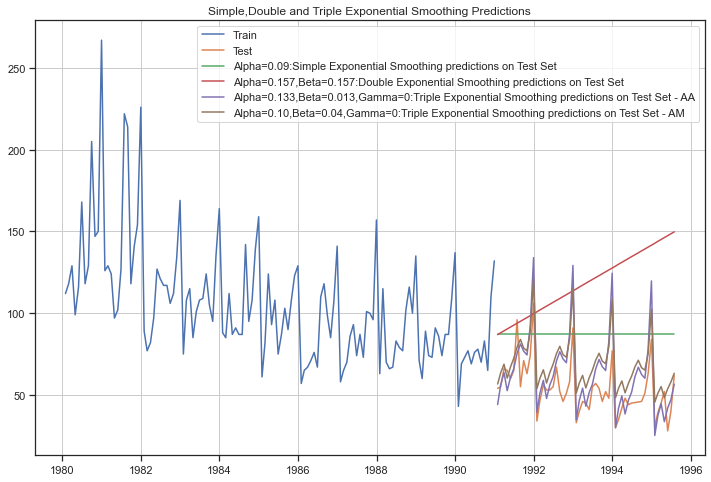

In [178]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=0.09:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.157,Beta=0.157:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.133,Beta=0.013,Gamma=0:Triple Exponential Smoothing predictions on Test Set - AA')
plt.plot(TES_predict_am, label='Alpha=0.10,Beta=0.04,Gamma=0:Triple Exponential Smoothing predictions on Test Set - AM')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

### Report model accuracy:

In [179]:
print('TES_am RMSE:',mean_squared_error(test.values,TES_predict_am.values,squared=False))

TES_am RMSE: 17.369487983082685


In [180]:
resultsDf_temp2 = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict_am.values,squared=False)]}
                           ,index=['Alpha=0.10,Beta=0.04,Gamma=0:TES - AM'])

resultsDf4 = pd.concat([resultsDf3, resultsDf_temp2])
resultsDf4

Test RMSE
Alpha=0.09,SES                           36.796249
Alpha=0.157,Beta=0.157:DES               70.572452
Alpha=0.133,Beta=0.013,Gamma=0:TES - AA  16.447474
Alpha=0.10,Beta=0.04,Gamma=0:TES - AM    17.369488

### Triple Exponential Smoothing model by taking the best alpha, beta and gamma [all in the range of 0.1 to 1 taking an interval of 0.1]

In [181]:
TES_train = train.copy()
TES_test = test.copy()

In [182]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_model = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Test RMSE': []})
resultsDf_model

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Test RMSE]
Index: []

In [183]:
model_TES = ExponentialSmoothing(TES_train['Rose'],trend='additive',seasonal='additive')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


In [184]:
from sklearn import metrics

In [185]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_seasonal=k,use_brute = True)
            
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
                
            rmse_model6_test_2 = metrics.mean_squared_error(TES_test['Rose'],TES_test['predict',i,j,k],squared=False)
                    
            resultsDf_model = resultsDf_model.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k
                                                  ,'Test RMSE':rmse_model6_test_2}, ignore_index=True)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-pac

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-pac

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-pac

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-pac

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-pac

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-pac

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-pac

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-pac

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-pac

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-pac

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-pac

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-pac

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-pac

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-pac

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-pac

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-pac

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-pac

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-pac

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-pac

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-pac

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-pac

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-pac

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-pac

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-pac

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-pac

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-pac

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-pac

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-pac

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-pac

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-pac

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-pac

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-pac

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-pac

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-pac

In [186]:
resultsDf_model

Alpha Values  Beta Values  Gamma Values  Test RMSE
0             0.1          0.1           0.1  16.283780
1             0.1          0.1           0.2  15.893445
2             0.1          0.1           0.3  15.922984
3             0.1          0.1           0.4  16.272583
4             0.1          0.1           0.5  16.842236
..            ...          ...           ...        ...
995           1.0          1.0           0.6  51.892942
996           1.0          1.0           0.7  54.626610
997           1.0          1.0           0.8  65.635962
998           1.0          1.0           0.9  82.126414
999           1.0          1.0           1.0  96.085717

[1000 rows x 4 columns]

In [187]:
resultsDf_model.sort_values(by=['Test RMSE'],ascending=True)

Alpha Values  Beta Values  Gamma Values  Test RMSE
21            0.1          0.3           0.2  15.893445
1             0.1          0.1           0.2  15.893445
31            0.1          0.4           0.2  15.893445
81            0.1          0.9           0.2  15.893445
41            0.1          0.5           0.2  15.893445
..            ...          ...           ...        ...
979           1.0          0.8           1.0  96.085717
949           1.0          0.5           1.0  96.085717
959           1.0          0.6           1.0  96.085717
919           1.0          0.2           1.0  96.085717
999           1.0          1.0           1.0  96.085717

[1000 rows x 4 columns]

In [188]:
temp_resultsDf3 = pd.DataFrame({'Test RMSE': [resultsDf_model.sort_values(by=['Test RMSE'],ascending=True).values[0][3]]}
                              ,index=['Alpha=0.1,Beta=0.3,Gamma=0.2:TES - Range'])

resultsDf5 = pd.concat([resultsDf4, temp_resultsDf3])
resultsDf5

Test RMSE
Alpha=0.09,SES                            36.796249
Alpha=0.157,Beta=0.157:DES                70.572452
Alpha=0.133,Beta=0.013,Gamma=0:TES - AA   16.447474
Alpha=0.10,Beta=0.04,Gamma=0:TES - AM     17.369488
Alpha=0.1,Beta=0.3,Gamma=0.2:TES - Range  15.893445

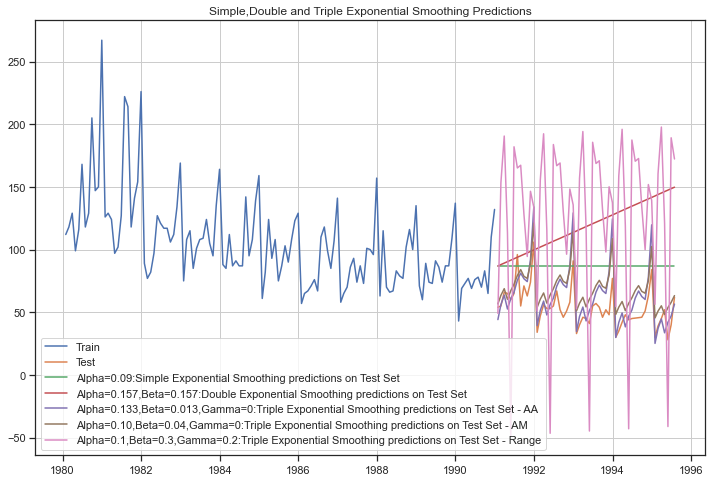

In [189]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=0.09:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.157,Beta=0.157:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.133,Beta=0.013,Gamma=0:Triple Exponential Smoothing predictions on Test Set - AA')
plt.plot(TES_predict_am, label='Alpha=0.10,Beta=0.04,Gamma=0:Triple Exponential Smoothing predictions on Test Set - AM')
plt.plot(TES_test['predict',i,j,k], label = 'Alpha=0.1,Beta=0.3,Gamma=0.2:Triple Exponential Smoothing predictions on Test Set - Range')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

### Evaluating the most optimum model on the whole data:

In [190]:
# Initializing the Double Exponential Smoothing Model
model_TES_aa = ExponentialSmoothing(df['Rose'],trend='additive',seasonal='additive')
# Fitting the model
model_TES_aa = model_TES_aa.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_aa.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.1423605739447875, 'smoothing_slope': 0.01151090678676998, 'smoothing_seasonal': 0.0, 'damping_slope': nan, 'initial_level': 62.134680762149486, 'initial_slope': 0.0, 'initial_seasons': array([ 54.35015303,  65.16365409,  73.2356867 ,  66.54005238,
        70.43592826,  76.43625425,  87.59252696,  87.65127389,
        84.994424  ,  84.24360856,  99.35438854, 138.12834396]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


### Predicting 12 months into the future:

In [191]:
# Forecasting using this model for the duration of the test set
TES_predict_aa =  model_TES_aa.forecast(steps = 12)
TES_predict_aa

1995-08-31     52.550728
1995-09-30     49.488819
1995-10-31     48.332944
1995-11-30     63.038665
1995-12-31    101.407560
1996-01-31     17.224310
1996-02-29     27.632752
1996-03-31     35.299725
1996-04-30     28.199031
1996-05-31     31.689847
1996-06-30     37.285114
1996-07-31     48.036327
Freq: M, dtype: float64

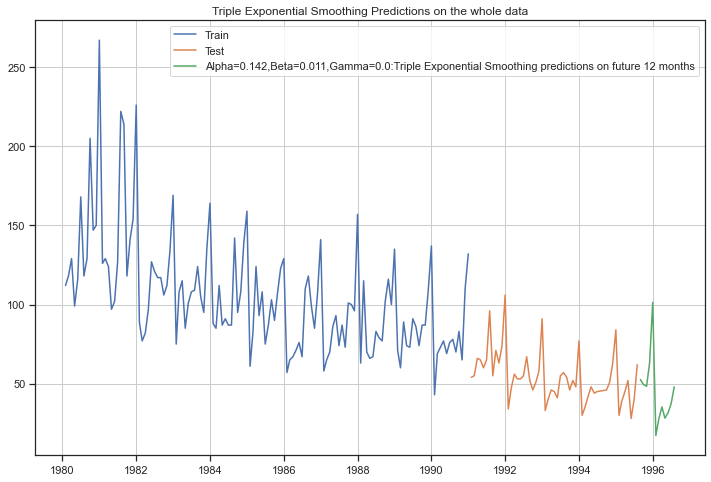

In [192]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(TES_predict_aa, label='Alpha=0.142,Beta=0.011,Gamma=0.0:Triple Exponential Smoothing predictions on future 12 months')

plt.legend(loc='best')
plt.grid()
plt.title('Triple Exponential Smoothing Predictions on the whole data');

### Report model accuracy:

In [193]:
#import necessary libraries
from sklearn.metrics import mean_squared_error
from math import sqrt

#calculate RMSE
rmse = mean_squared_error(df['Rose'],model_TES_aa.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 17.88608958045724


In [194]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(df['Rose'],model_TES_aa.fittedvalues,squared=False)]}
                           ,index=['Alpha=0.142,Beta=0.011,Gamma=0.0:TES 12 months future'])

resultsDf_future_12 = pd.concat([resultsDf5, resultsDf_temp])
resultsDf_future_12

Test RMSE
Alpha=0.09,SES                                      36.796249
Alpha=0.157,Beta=0.157:DES                          70.572452
Alpha=0.133,Beta=0.013,Gamma=0:TES - AA             16.447474
Alpha=0.10,Beta=0.04,Gamma=0:TES - AM               17.369488
Alpha=0.1,Beta=0.3,Gamma=0.2:TES - Range            15.893445
Alpha=0.142,Beta=0.011,Gamma=0.0:TES 12 months ...  17.886090

### Linear Regression model:

In [195]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [196]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [197]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
              Rose  time
Time_Stamp             
1980-01-31  112.0     1
1980-02-29  118.0     2
1980-03-31  129.0     3
1980-04-30   99.0     4
1980-05-31  116.0     5 

Last few rows of Training Data 
              Rose  time
Time_Stamp             
1990-08-31   70.0   128
1990-09-30   83.0   129
1990-10-31   65.0   130
1990-11-30  110.0   131
1990-12-31  132.0   132 

First few rows of Test Data 
             Rose  time
Time_Stamp            
1991-01-31  54.0   133
1991-02-28  55.0   134
1991-03-31  66.0   135
1991-04-30  65.0   136
1991-05-31  60.0   137 

Last few rows of Test Data 
             Rose  time
Time_Stamp            
1995-03-31  45.0   183
1995-04-30  52.0   184
1995-05-31  28.0   185
1995-06-30  40.0   186
1995-07-31  62.0   187 



In [198]:
from sklearn.linear_model import LinearRegression

In [199]:
lr = LinearRegression()

In [200]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Rose'].values)

LinearRegression()

In [201]:
test_predictions_model1 = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

### Model Evaluation using RMSE:

In [202]:
from sklearn import metrics

In [203]:
## Test Data - RMSE

lrmodel_rmse_test = metrics.mean_squared_error(test['Rose'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(lrmodel_rmse_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 15.269


In [204]:
resultsdf = pd.DataFrame({'Test RMSE': [lrmodel_rmse_test]},index=['RegressionOnTime'])
resultsDf6= pd.concat([resultsDf_future_12, resultsdf])
resultsDf6

Test RMSE
Alpha=0.09,SES                                      36.796249
Alpha=0.157,Beta=0.157:DES                          70.572452
Alpha=0.133,Beta=0.013,Gamma=0:TES - AA             16.447474
Alpha=0.10,Beta=0.04,Gamma=0:TES - AM               17.369488
Alpha=0.1,Beta=0.3,Gamma=0.2:TES - Range            15.893445
Alpha=0.142,Beta=0.011,Gamma=0.0:TES 12 months ...  17.886090
RegressionOnTime                                    15.268955

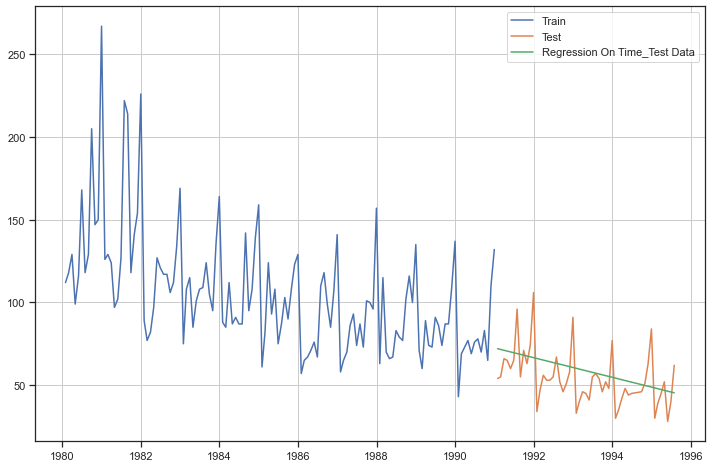

In [205]:
train_predictions_model1         = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1

test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.plot( train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.legend(loc='best')
plt.grid();

### Naive approach model:

In [206]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [207]:
train.tail()

Rose
Time_Stamp       
1990-08-31   70.0
1990-09-30   83.0
1990-10-31   65.0
1990-11-30  110.0
1990-12-31  132.0

In [208]:
NaiveModel_test['naive'] = np.asarray(train['Rose'])[len(np.asarray(train['Rose']))-1]
NaiveModel_test['naive'].head()

Time_Stamp
1991-01-31    132.0
1991-02-28    132.0
1991-03-31    132.0
1991-04-30    132.0
1991-05-31    132.0
Name: naive, dtype: float64

### Model Evaluation using RMSE:

In [209]:
rmse_naivemodel_test = metrics.mean_squared_error(test['Rose'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_naivemodel_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 79.719


In [210]:
results_naive = pd.DataFrame({'Test RMSE': [rmse_naivemodel_test]},index=['NaiveModel'])

resultsDf7 = pd.concat([resultsDf6, results_naive])
resultsDf7

Test RMSE
Alpha=0.09,SES                                      36.796249
Alpha=0.157,Beta=0.157:DES                          70.572452
Alpha=0.133,Beta=0.013,Gamma=0:TES - AA             16.447474
Alpha=0.10,Beta=0.04,Gamma=0:TES - AM               17.369488
Alpha=0.1,Beta=0.3,Gamma=0.2:TES - Range            15.893445
Alpha=0.142,Beta=0.011,Gamma=0.0:TES 12 months ...  17.886090
RegressionOnTime                                    15.268955
NaiveModel                                          79.718773

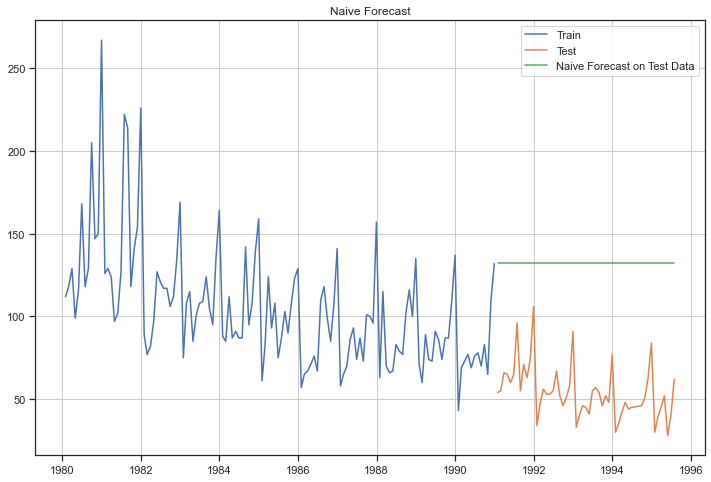

In [211]:
plt.plot(NaiveModel_train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

### Simple Average model:

In [212]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [213]:
SimpleAverage_test['mean_forecast'] = train['Rose'].mean()
SimpleAverage_test.head()

Rose  mean_forecast
Time_Stamp                     
1991-01-31  54.0     104.939394
1991-02-28  55.0     104.939394
1991-03-31  66.0     104.939394
1991-04-30  65.0     104.939394
1991-05-31  60.0     104.939394

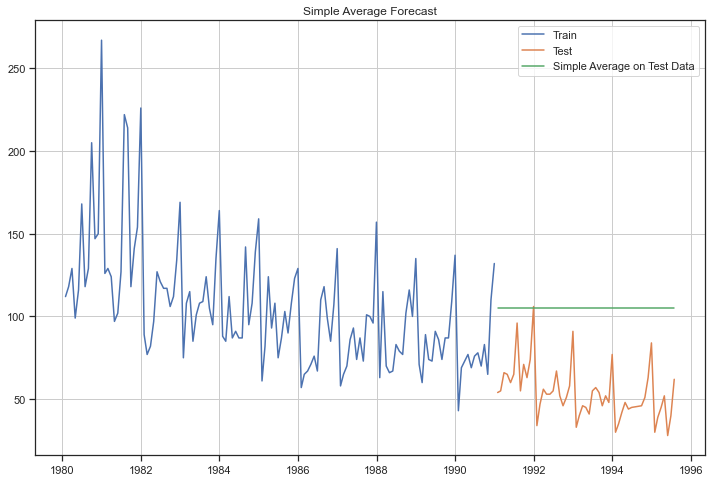

In [214]:
plt.plot(SimpleAverage_train['Rose'], label='Train')
plt.plot(SimpleAverage_test['Rose'], label='Test')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

### Model evaluation using RMSE:

In [215]:
rmse_model3_test = metrics.mean_squared_error(test['Rose'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 53.461


In [216]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]}
                           ,index=['SimpleAverageModel'])

resultsDf8 = pd.concat([resultsDf7, resultsDf_3])
resultsDf8

Test RMSE
Alpha=0.09,SES                                      36.796249
Alpha=0.157,Beta=0.157:DES                          70.572452
Alpha=0.133,Beta=0.013,Gamma=0:TES - AA             16.447474
Alpha=0.10,Beta=0.04,Gamma=0:TES - AM               17.369488
Alpha=0.1,Beta=0.3,Gamma=0.2:TES - Range            15.893445
Alpha=0.142,Beta=0.011,Gamma=0.0:TES 12 months ...  17.886090
RegressionOnTime                                    15.268955
NaiveModel                                          79.718773
SimpleAverageModel                                  53.460570

### Moving Average(MA) models:

In [217]:
MovingAverage = df.copy()
MovingAverage.head()

Rose
Time_Stamp       
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0

In [218]:
MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Rose'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Rose'].rolling(9).mean()

MovingAverage.head()

Rose  Trailing_2  Trailing_4  Trailing_6  Trailing_9
Time_Stamp                                                       
1980-01-31  112.0         NaN         NaN         NaN         NaN
1980-02-29  118.0       115.0         NaN         NaN         NaN
1980-03-31  129.0       123.5         NaN         NaN         NaN
1980-04-30   99.0       114.0       114.5         NaN         NaN
1980-05-31  116.0       107.5       115.5         NaN         NaN

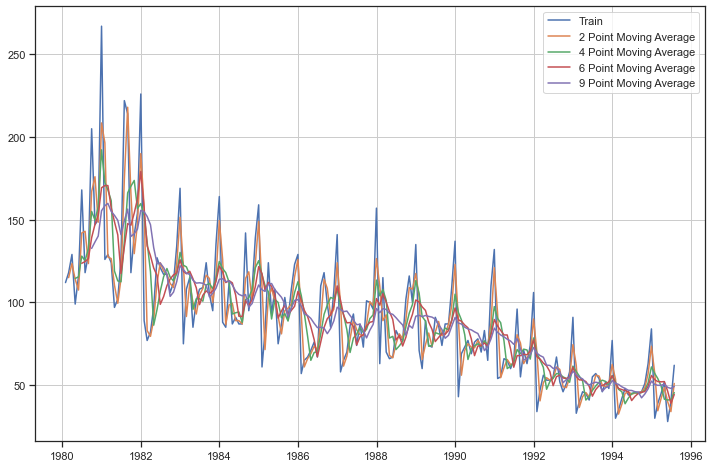

In [219]:
## Plotting on the whole data

plt.plot(MovingAverage['Rose'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [220]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[MovingAverage.index.year < 1991] 
trailing_MovingAverage_test=MovingAverage[MovingAverage.index.year >= 1991]

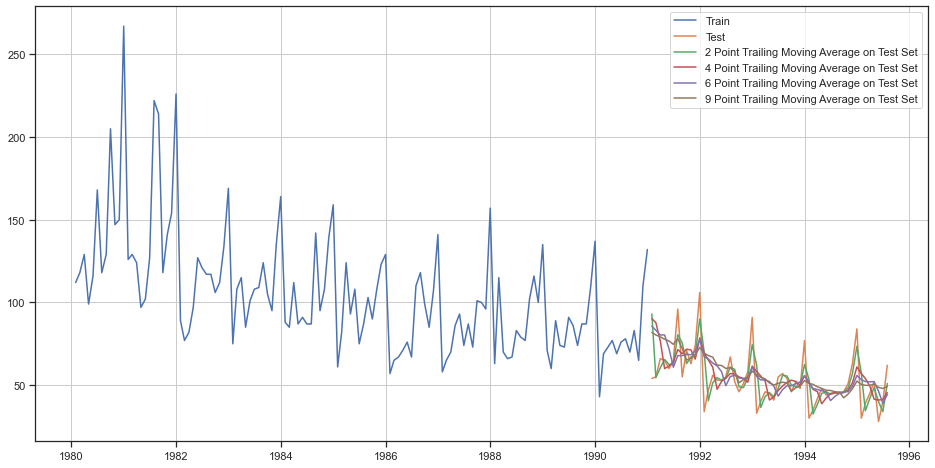

In [221]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')


plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.grid();

### Model Evaluation using RMSE:

In [222]:
## Test Data - RMSE  --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 11.529
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 14.451
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 14.566
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 14.728


In [223]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf9 = pd.concat([resultsDf8, resultsDf_4])
resultsDf9

Test RMSE
Alpha=0.09,SES                                      36.796249
Alpha=0.157,Beta=0.157:DES                          70.572452
Alpha=0.133,Beta=0.013,Gamma=0:TES - AA             16.447474
Alpha=0.10,Beta=0.04,Gamma=0:TES - AM               17.369488
Alpha=0.1,Beta=0.3,Gamma=0.2:TES - Range            15.893445
Alpha=0.142,Beta=0.011,Gamma=0.0:TES 12 months ...  17.886090
RegressionOnTime                                    15.268955
NaiveModel                                          79.718773
SimpleAverageModel                                  53.460570
2pointTrailingMovingAverage                         11.529278
4pointTrailingMovingAverage                         14.451403
6pointTrailingMovingAverage                         14.566327
9pointTrailingMovingAverage                         14.727630

### Checking for Stationarity of the whole time series data:

In [224]:
import sklearn
import statsmodels
from statsmodels.tsa.stattools import adfuller

The hypothesis in a simple form for the ADF test is:

𝐻0  : Null hypothesis: The Time Series has a unit root and is thus non-stationary.

𝐻1  : ALternate hypothesis: The Time Series does not have a unit root and is thus stationary.

It is to note that the $\alpha$ value is 0.05

In [225]:
dftest = adfuller(df,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -2.240
DF test p-value is 0.4671371627793159
Number of lags used 13


We see that at 5% significant level the Time Series is non-stationary.

Let us take one level of differencing to see whether the series becomes stationary.

In [226]:
dftest = adfuller(df.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -8.162
DF test p-value is 3.015976115827461e-11
Number of lags used 12


Plotting the stationary series:

In [227]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

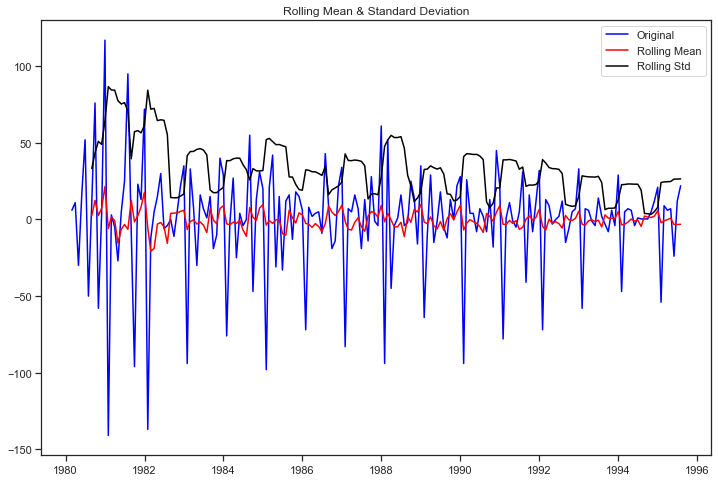

Results of Dickey-Fuller Test:
Test Statistic                -8.044392e+00
p-value                        1.810895e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.730000e+02
Critical Value (1%)           -3.468726e+00
Critical Value (5%)           -2.878396e+00
Critical Value (10%)          -2.575756e+00
dtype: float64 



In [228]:
test_stationarity(df['Rose'].diff().dropna())

### Automated version of an SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC) and for a seasonality as 6:

In [229]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary. The seasonal
## differencing 'D' will be between 0 and 2 to check if it is neeeded or not.

import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(0,2)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (0, 1, 3)(0, 0, 3, 6)
Model: (1, 1, 0)(0, 1, 0, 6)
Model: (1, 1, 1)(0, 1, 1, 6)
Model: (1, 1, 2)(0, 1, 2, 6)
Model: (1, 1, 3)(0, 1, 3, 6)
Model: (2, 1, 0)(1, 0, 0, 6)
Model: (2, 1, 1)(1, 0, 1, 6)
Model: (2, 1, 2)(1, 0, 2, 6)
Model: (2, 1, 3)(1, 0, 3, 6)
Model: (3, 1, 0)(1, 1, 0, 6)
Model: (3, 1, 1)(1, 1, 1, 6)
Model: (3, 1, 2)(1, 1, 2, 6)
Model: (3, 1, 3)(1, 1, 3, 6)


In [230]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [231]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:1264.4996261104895
SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:1144.7077471821256
SARIMA(0, 1, 0)x(0, 0, 3, 6) - AIC:1081.2713830590483
SARIMA(0, 1, 0)x(0, 1, 0, 6) - AIC:1362.6525264440118
SARIMA(0, 1, 0)x(0, 1, 1, 6) - AIC:1185.4374421241248
SARIMA(0, 1, 0)x(0, 1, 2, 6) - AIC:1085.2221765752795
SARIMA(0, 1, 0)x(0, 1, 3, 6) - AIC:990.588785436192
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:1274.7897737087983
SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:1241.7870945124582
SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:1146.309326670212
SARIMA(0, 1, 0)x(1, 0, 3, 6) - AIC:1058.9861743271363
SARIMA(0, 1, 0)x(1, 1, 0, 6) - AIC:1170.9535453581375
SARIMA(0, 1, 0)x(1, 1, 1, 6) - AIC:1159.5733057213765
SARIMA(0, 1, 0)x(1, 1, 2, 6) - AIC:1055.7799645075559
SARIMA(0, 1, 0)x(1, 1, 3, 6) - AIC:966.917727470869
SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC:1137.9167236212038
SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:1137.4533629405337
SARIMA(0, 1, 0)x(2, 0, 2, 6) - AI

SARIMA(1, 1, 0)x(3, 0, 2, 6) - AIC:1048.2388443546142
SARIMA(1, 1, 0)x(3, 0, 3, 6) - AIC:1044.9201145758916
SARIMA(1, 1, 0)x(3, 1, 0, 6) - AIC:952.415183505014
SARIMA(1, 1, 0)x(3, 1, 1, 6) - AIC:952.7401007927078
SARIMA(1, 1, 0)x(3, 1, 2, 6) - AIC:954.4244419776032
SARIMA(1, 1, 0)x(3, 1, 3, 6) - AIC:951.7117036070603
SARIMA(1, 1, 1)x(0, 0, 0, 6) - AIC:1262.1840064428397
SARIMA(1, 1, 1)x(0, 0, 1, 6) - AIC:1201.503714479248
SARIMA(1, 1, 1)x(0, 0, 2, 6) - AIC:1093.6044318878166
SARIMA(1, 1, 1)x(0, 0, 3, 6) - AIC:1016.734593048264
SARIMA(1, 1, 1)x(0, 1, 0, 6) - AIC:1300.0001789409696
SARIMA(1, 1, 1)x(0, 1, 1, 6) - AIC:1129.4520794912344
SARIMA(1, 1, 1)x(0, 1, 2, 6) - AIC:1019.1406743413562
SARIMA(1, 1, 1)x(0, 1, 3, 6) - AIC:943.70067044807
SARIMA(1, 1, 1)x(1, 0, 0, 6) - AIC:1213.6233142837384
SARIMA(1, 1, 1)x(1, 0, 1, 6) - AIC:1162.4240004667624
SARIMA(1, 1, 1)x(1, 0, 2, 6) - AIC:1083.2585835667267
SARIMA(1, 1, 1)x(1, 0, 3, 6) - AIC:1003.956706486781
SARIMA(1, 1, 1)x(1, 1, 0, 6) - AIC:1108

SARIMA(2, 1, 1)x(2, 1, 0, 6) - AIC:996.5671248399693
SARIMA(2, 1, 1)x(2, 1, 1, 6) - AIC:989.8750414420973
SARIMA(2, 1, 1)x(2, 1, 2, 6) - AIC:968.5764377587213
SARIMA(2, 1, 1)x(2, 1, 3, 6) - AIC:924.3635464812934
SARIMA(2, 1, 1)x(3, 0, 0, 6) - AIC:974.1258779207323
SARIMA(2, 1, 1)x(3, 0, 1, 6) - AIC:975.8068387003241
SARIMA(2, 1, 1)x(3, 0, 2, 6) - AIC:967.6521348907844
SARIMA(2, 1, 1)x(3, 0, 3, 6) - AIC:967.174092454059
SARIMA(2, 1, 1)x(3, 1, 0, 6) - AIC:914.9052780129532
SARIMA(2, 1, 1)x(3, 1, 1, 6) - AIC:916.8748004969449
SARIMA(2, 1, 1)x(3, 1, 2, 6) - AIC:922.6244081443812
SARIMA(2, 1, 1)x(3, 1, 3, 6) - AIC:920.2068051405502
SARIMA(2, 1, 2)x(0, 0, 0, 6) - AIC:1253.9102116544232
SARIMA(2, 1, 2)x(0, 0, 1, 6) - AIC:1185.769540284492
SARIMA(2, 1, 2)x(0, 0, 2, 6) - AIC:1082.5581080595218
SARIMA(2, 1, 2)x(0, 0, 3, 6) - AIC:1005.4894642725634
SARIMA(2, 1, 2)x(0, 1, 0, 6) - AIC:1282.94413907689
SARIMA(2, 1, 2)x(0, 1, 1, 6) - AIC:1116.9299071721352
SARIMA(2, 1, 2)x(0, 1, 2, 6) - AIC:1011.1384

SARIMA(3, 1, 2)x(1, 1, 2, 6) - AIC:959.6222383091581
SARIMA(3, 1, 2)x(1, 1, 3, 6) - AIC:914.6189019230783
SARIMA(3, 1, 2)x(2, 0, 0, 6) - AIC:1065.4439245840947
SARIMA(3, 1, 2)x(2, 0, 1, 6) - AIC:1060.9598377989657
SARIMA(3, 1, 2)x(2, 0, 2, 6) - AIC:1046.4298652243735
SARIMA(3, 1, 2)x(2, 0, 3, 6) - AIC:962.4545244895778
SARIMA(3, 1, 2)x(2, 1, 0, 6) - AIC:986.7121117067953
SARIMA(3, 1, 2)x(2, 1, 1, 6) - AIC:995.44634698482
SARIMA(3, 1, 2)x(2, 1, 2, 6) - AIC:961.5196736703914
SARIMA(3, 1, 2)x(2, 1, 3, 6) - AIC:945.9652947431288
SARIMA(3, 1, 2)x(3, 0, 0, 6) - AIC:963.4445056016675
SARIMA(3, 1, 2)x(3, 0, 1, 6) - AIC:964.8545583221844
SARIMA(3, 1, 2)x(3, 0, 2, 6) - AIC:962.569223251226
SARIMA(3, 1, 2)x(3, 0, 3, 6) - AIC:964.2706211476559
SARIMA(3, 1, 2)x(3, 1, 0, 6) - AIC:935.2043559934037
SARIMA(3, 1, 2)x(3, 1, 1, 6) - AIC:908.4349043558253
SARIMA(3, 1, 2)x(3, 1, 2, 6) - AIC:905.9925460871154
SARIMA(3, 1, 2)x(3, 1, 3, 6) - AIC:910.4421143421478


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 3)x(0, 0, 0, 6) - AIC:1243.7385832635168
SARIMA(3, 1, 3)x(0, 0, 1, 6) - AIC:1176.1392424520554
SARIMA(3, 1, 3)x(0, 0, 2, 6) - AIC:1057.3381479611166
SARIMA(3, 1, 3)x(0, 0, 3, 6) - AIC:994.1519400230708
SARIMA(3, 1, 3)x(0, 1, 0, 6) - AIC:1261.3222043907435
SARIMA(3, 1, 3)x(0, 1, 1, 6) - AIC:1097.4893701597243
SARIMA(3, 1, 3)x(0, 1, 2, 6) - AIC:989.0606951149535
SARIMA(3, 1, 3)x(0, 1, 3, 6) - AIC:920.8068248298802
SARIMA(3, 1, 3)x(1, 0, 0, 6) - AIC:1179.1465376682622
SARIMA(3, 1, 3)x(1, 0, 1, 6) - AIC:1126.6260692254796
SARIMA(3, 1, 3)x(1, 0, 2, 6) - AIC:1057.3136903264021
SARIMA(3, 1, 3)x(1, 0, 3, 6) - AIC:982.7015024863858
SARIMA(3, 1, 3)x(1, 1, 0, 6) - AIC:1087.5913591574845
SARIMA(3, 1, 3)x(1, 1, 1, 6) - AIC:1053.6892572071579
SARIMA(3, 1, 3)x(1, 1, 2, 6) - AIC:945.2161748851339
SARIMA(3, 1, 3)x(1, 1, 3, 6) - AIC:901.0244526663688
SARIMA(3, 1, 3)x(2, 0, 0, 6) - AIC:1044.9852881211903
SARIMA(3, 1, 3)x(2, 0, 1, 6) - AIC:1054.367221754482
SARIMA(3, 1, 3)x(2, 0, 2, 6) - AIC:

In [232]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param      seasonal         AIC
375  (2, 1, 3)  (2, 1, 3, 6)  889.189449
503  (3, 1, 3)  (2, 1, 3, 6)  891.125709
511  (3, 1, 3)  (3, 1, 3, 6)  893.125753
367  (2, 1, 3)  (1, 1, 3, 6)  894.757072
127  (0, 1, 3)  (3, 1, 3, 6)  894.905688

In [233]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(train['Rose'],
                                order=(2, 1, 3),
                                seasonal_order=(2, 1, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


                                     SARIMAX Results                                     
Dep. Variable:                              Rose   No. Observations:                  132
Model:             SARIMAX(2, 1, 3)x(2, 1, 3, 6)   Log Likelihood                -433.595
Date:                           Sat, 22 May 2021   AIC                            889.189
Time:                                   22:00:53   BIC                            918.171
Sample:                               01-31-1980   HQIC                           900.928
                                    - 12-31-1990                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5746      0.023     25.056      0.000       0.530       0.620
ar.L2         -0.9163      0.021    -43.488

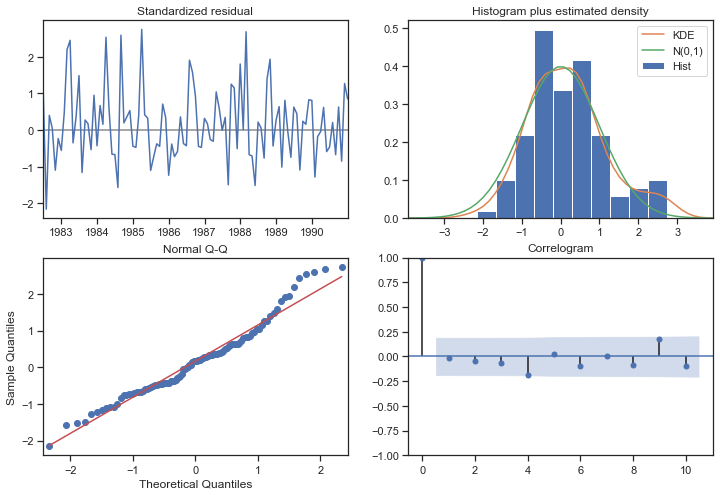

In [234]:
results_auto_SARIMA.plot_diagnostics()
plt.show()

### Predict on the Test Set using this model and evaluate the model :

In [235]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test))

In [236]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

Rose             mean    mean_se  mean_ci_lower  mean_ci_upper
1991-01-31  54.888060  15.044470      25.401441      84.374680
1991-02-28  63.981511  15.156749      34.274829      93.688192
1991-03-31  71.835016  15.454244      41.545255     102.124778
1991-04-30  69.051596  15.806991      38.070464     100.032728
1991-05-31  77.053088  15.992891      45.707599     108.398578

In [237]:
rmse = mean_squared_error(test['Rose'],predicted_auto_SARIMA.predicted_mean,squared=False)
print('Test RMSE:',rmse)

Test RMSE: 16.741196366238057


In [238]:
temp_resultsDf = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['SARIMA(2,1,3)(2,1,3,6)'])


resultsDf10 = pd.concat([resultsDf9,temp_resultsDf])

resultsDf10

Test RMSE
Alpha=0.09,SES                                      36.796249
Alpha=0.157,Beta=0.157:DES                          70.572452
Alpha=0.133,Beta=0.013,Gamma=0:TES - AA             16.447474
Alpha=0.10,Beta=0.04,Gamma=0:TES - AM               17.369488
Alpha=0.1,Beta=0.3,Gamma=0.2:TES - Range            15.893445
Alpha=0.142,Beta=0.011,Gamma=0.0:TES 12 months ...  17.886090
RegressionOnTime                                    15.268955
NaiveModel                                          79.718773
SimpleAverageModel                                  53.460570
2pointTrailingMovingAverage                         11.529278
4pointTrailingMovingAverage                         14.451403
6pointTrailingMovingAverage                         14.566327
9pointTrailingMovingAverage                         14.727630
SARIMA(2,1,3)(2,1,3,6)                              16.741196

### ACF and PACF on the time series data:

In [239]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

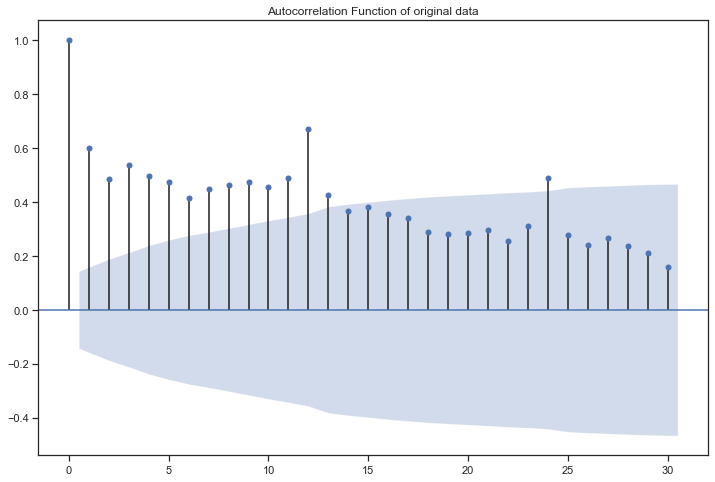

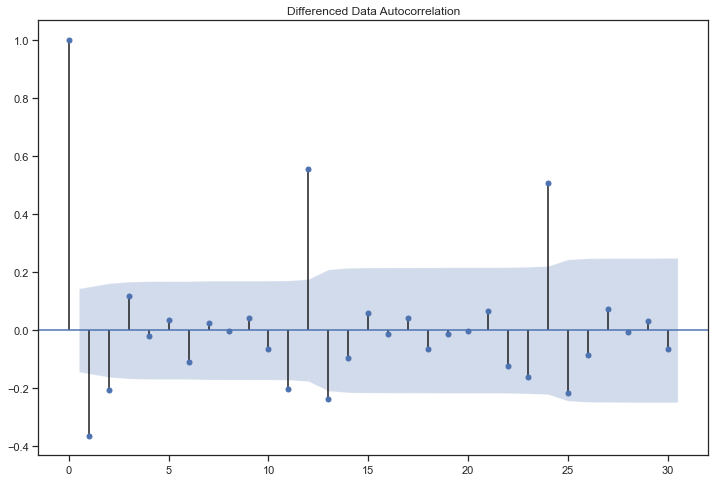

In [240]:
plot_acf(df['Rose'],lags=30, title = 'Autocorrelation Function of original data')
plot_acf(df['Rose'].diff().dropna(),lags=30,title='Differenced Data Autocorrelation')
plt.show()

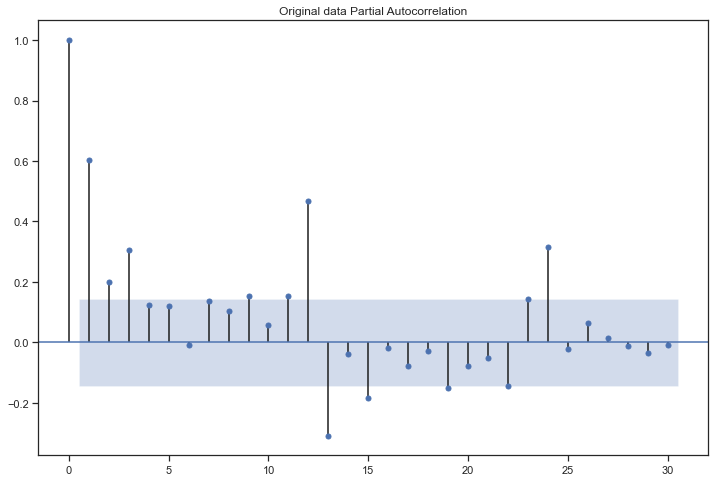

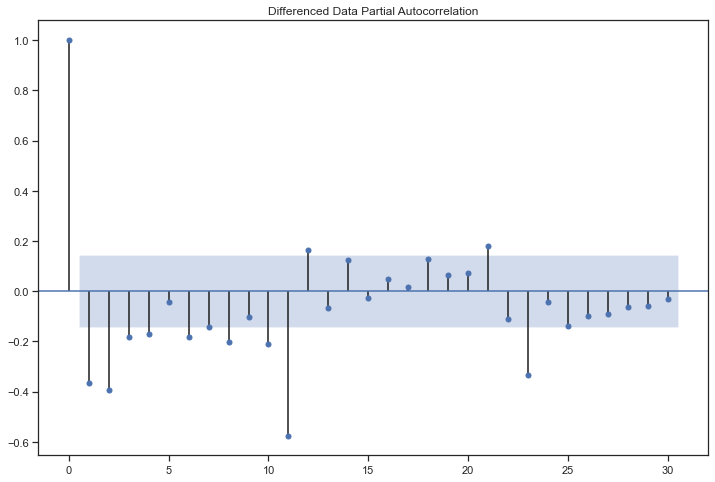

In [241]:
plot_pacf(df['Rose'],lags=30, title = 'Original data Partial Autocorrelation')
plot_pacf(df['Rose'].diff().dropna(),lags=30,title='Differenced Data Partial Autocorrelation')
plt.show()

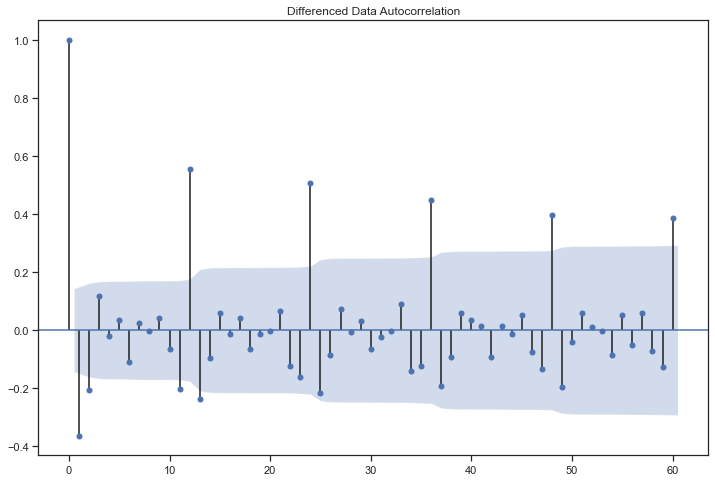

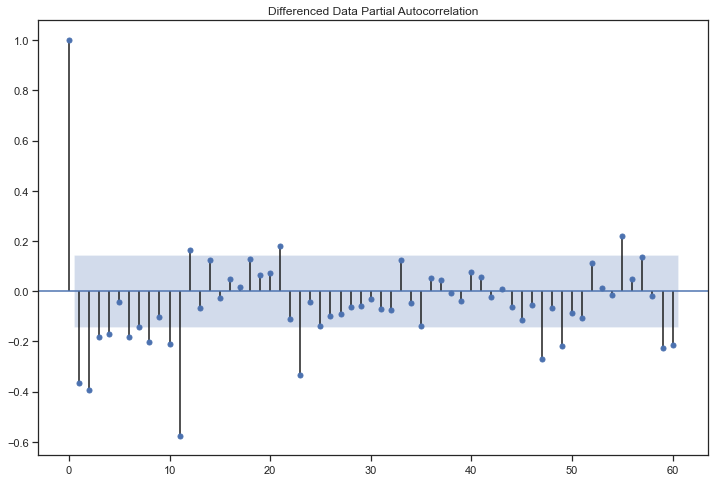

In [242]:
### Autocorrelation and Partial Autocorrelation plot with a higher lag count:
plot_acf(df['Rose'].diff().dropna(),lags=60,title='Differenced Data Autocorrelation')
plot_pacf(df['Rose'].diff().dropna(),lags=60,title='Differenced Data Partial Autocorrelation')
plt.show()

By looking at the above plots, we can say the following:

1. The ACF plot cuts off at lag 2. i.e. The Moving-Average parameter in an ARIMA model, q = 2
2. The PACF plot cuts off at lag 4. i.e. The Auto-Regressive parameter in an ARIMA mode, p = 4
3. We can also see there is a seasonality present and can be considered as either 6 or 12.


Let us plot the original data and the differenced series:

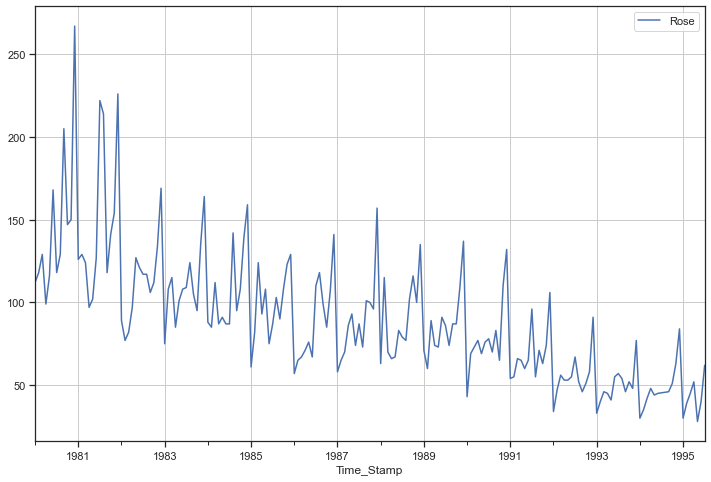

In [243]:
df.plot()
plt.grid();

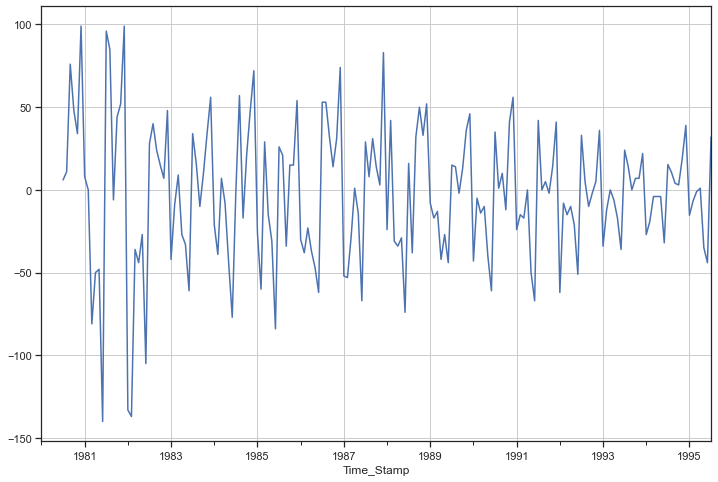

In [244]:
# in the above plot, we can see there is both trend and seasonality:
# Let us take a seasonal differencing and look at the series:

(df['Rose'].diff(6)).plot()
plt.grid();

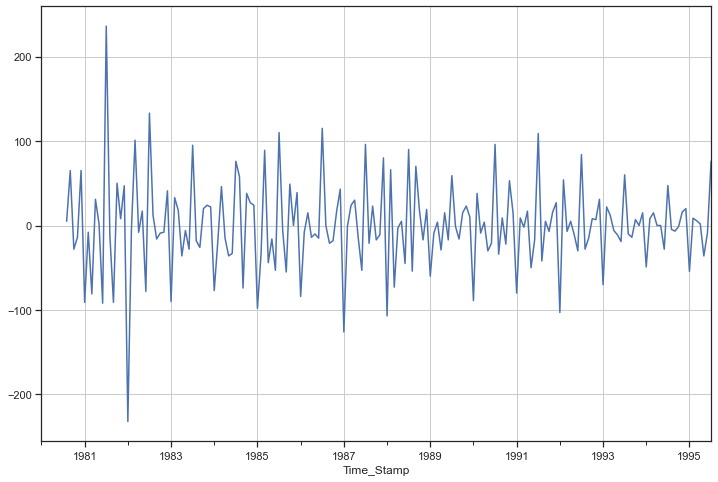

In [245]:
# We can see there is a slight trend present in the data:
# So we take a differencing of first order on the seasonally differenced series.

(df['Rose'].diff(6)).diff().plot()
plt.grid();

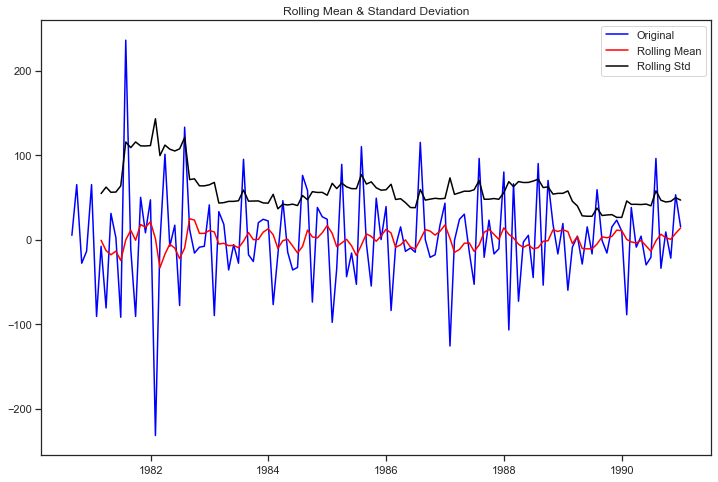

Results of Dickey-Fuller Test:
Test Statistic                -6.882869e+00
p-value                        1.418693e-09
#Lags Used                     1.300000e+01
Number of Observations Used    1.110000e+02
Critical Value (1%)           -3.490683e+00
Critical Value (5%)           -2.887952e+00
Critical Value (10%)          -2.580857e+00
dtype: float64 



In [246]:
### Checking for the stationarity of the above series:
test_stationarity((train['Rose'].diff(6).dropna()).diff(1).dropna())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


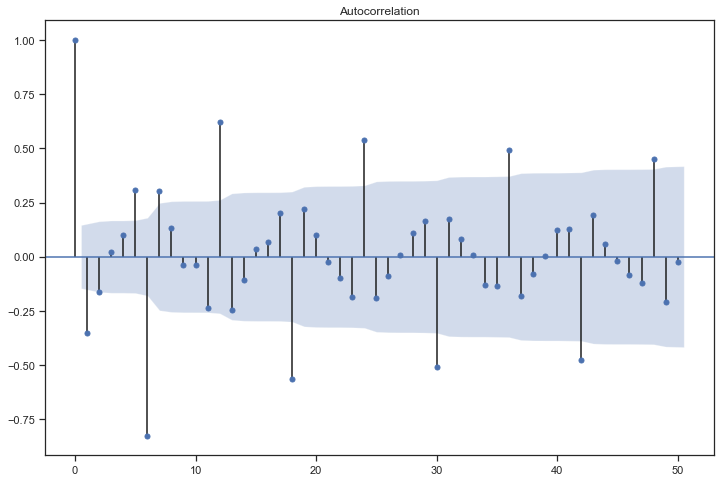

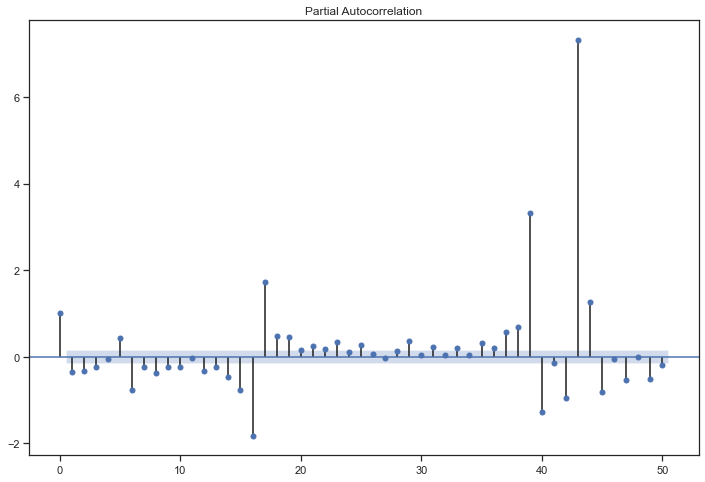

In [247]:
# Checking the new ACF and PACF plots for the new modified time series:

plot_acf((df['Rose'].diff(6).dropna()).diff(1).dropna(),lags=50)
plot_pacf((df['Rose'].diff(6).dropna()).diff(1).dropna(),lags=50);

In [248]:
# Here, P = 3 and Q is hard to interpreset as the lags in the ACF plot for seasonal differences do not cut off. So we take it as 2.
# Here the seasonal differencing is taken as 1 as there was one level differencing done after the series was made to be stationary.
# So we will take a range of P and Q values and the q = 2 and p = 3

In [249]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(train['Rose'],
                                order=(3,1,2),
                                seasonal_order=(3, 1, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


                                     SARIMAX Results                                     
Dep. Variable:                              Rose   No. Observations:                  132
Model:             SARIMAX(3, 1, 2)x(3, 1, 2, 6)   Log Likelihood                -441.996
Date:                           Sat, 22 May 2021   AIC                            905.993
Time:                                   22:01:23   BIC                            935.081
Sample:                               01-31-1980   HQIC                           917.777
                                    - 12-31-1990                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4395      0.315      1.395      0.163      -0.178       1.057
ar.L2         -0.1872      0.130     -1.442

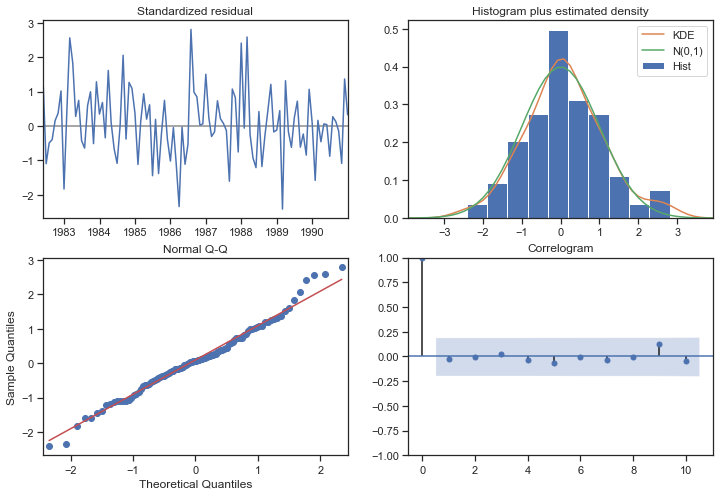

In [250]:
results_manual_SARIMA.plot_diagnostics()
plt.show()

### Predict on the Test Set using this model and evaluate the model

In [251]:
predicted_manual_SARIMA = results_manual_SARIMA.get_forecast(steps=len(test))

In [252]:
rmse = mean_squared_error(test['Rose'],predicted_manual_SARIMA.predicted_mean,squared=False)
print('RMSE:',rmse)

RMSE: 16.671918451270454


In [253]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['SARIMA(3,1,2)(3,1,2,6)'])


resultsDf11 = pd.concat([resultsDf10,temp_resultsDf])

resultsDf11

Test RMSE
Alpha=0.09,SES                                      36.796249
Alpha=0.157,Beta=0.157:DES                          70.572452
Alpha=0.133,Beta=0.013,Gamma=0:TES - AA             16.447474
Alpha=0.10,Beta=0.04,Gamma=0:TES - AM               17.369488
Alpha=0.1,Beta=0.3,Gamma=0.2:TES - Range            15.893445
Alpha=0.142,Beta=0.011,Gamma=0.0:TES 12 months ...  17.886090
RegressionOnTime                                    15.268955
NaiveModel                                          79.718773
SimpleAverageModel                                  53.460570
2pointTrailingMovingAverage                         11.529278
4pointTrailingMovingAverage                         14.451403
6pointTrailingMovingAverage                         14.566327
9pointTrailingMovingAverage                         14.727630
SARIMA(2,1,3)(2,1,3,6)                              16.741196
SARIMA(3,1,2)(3,1,2,6)                              16.671918

### Automated version of an SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC) and for a seasonality as 12:

In [254]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0,1,2,3.
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary. The seasonal
## differencing 'D' will be between 0,1 and 2.

import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(0,3)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (0, 1, 3)(0, 0, 3, 12)
Model: (1, 1, 0)(0, 1, 0, 12)
Model: (1, 1, 1)(0, 1, 1, 12)
Model: (1, 1, 2)(0, 1, 2, 12)
Model: (1, 1, 3)(0, 1, 3, 12)
Model: (2, 1, 0)(0, 2, 0, 12)
Model: (2, 1, 1)(0, 2, 1, 12)
Model: (2, 1, 2)(0, 2, 2, 12)
Model: (2, 1, 3)(0, 2, 3, 12)
Model: (3, 1, 0)(1, 0, 0, 12)
Model: (3, 1, 1)(1, 0, 1, 12)
Model: (3, 1, 2)(1, 0, 2, 12)
Model: (3, 1, 3)(1, 0, 3, 12)


In [255]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [256]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1145.4230827207402
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:976.4375296380888


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 1, 0)x(0, 0, 3, 12) - AIC:4389.985978569587
SARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC:1171.2013438278946
SARIMA(0, 1, 0)x(0, 1, 1, 12) - AIC:965.5057301644265
SARIMA(0, 1, 0)x(0, 1, 2, 12) - AIC:845.8687014723129


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\_numdiff.py:390: RuntimeWarning: invalid value encountered in less
  if np.any((x0 < lb) | (x0 > ub)):
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\_numdiff.py:390: RuntimeWarning: invalid value encountered in greater
  if np.any((x0 < lb) | (x0 > ub)):
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\_numdiff.py:405: RuntimeWarning: invalid value encountered in greater_equal
  sign_x0 = (x0 >= 0).astype(float) * 2 - 1
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 1, 0)x(0, 1, 3, 12) - AIC:nan
SARIMA(0, 1, 0)x(0, 2, 0, 12) - AIC:1150.4118075414572
SARIMA(0, 1, 0)x(0, 2, 1, 12) - AIC:902.2733434548056
SARIMA(0, 1, 0)x(0, 2, 2, 12) - AIC:776.4445451197355


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 0)x(0, 2, 3, 12) - AIC:666.255721024397
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1139.921738995602
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1116.0207869685466
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:969.6913640043985


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 1, 0)x(1, 0, 3, 12) - AIC:6403.166605706565
SARIMA(0, 1, 0)x(1, 1, 0, 12) - AIC:982.3269589658807
SARIMA(0, 1, 0)x(1, 1, 1, 12) - AIC:975.3375383684428
SARIMA(0, 1, 0)x(1, 1, 2, 12) - AIC:847.7332182644071


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 1, 0)x(1, 1, 3, 12) - AIC:nan
SARIMA(0, 1, 0)x(1, 2, 0, 12) - AIC:937.3029077938372
SARIMA(0, 1, 0)x(1, 2, 1, 12) - AIC:891.0317789355227
SARIMA(0, 1, 0)x(1, 2, 2, 12) - AIC:779.3865530453127
SARIMA(0, 1, 0)x(1, 2, 3, 12) - AIC:665.1592396701471
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:960.8812220353041
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:962.8794541633339
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:955.5735409343529


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 1, 0)x(2, 0, 3, 12) - AIC:4138.686456556402
SARIMA(0, 1, 0)x(2, 1, 0, 12) - AIC:858.5132698374405
SARIMA(0, 1, 0)x(2, 1, 1, 12) - AIC:853.3390728765636
SARIMA(0, 1, 0)x(2, 1, 2, 12) - AIC:842.6282241405684


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 1, 0)x(2, 1, 3, 12) - AIC:1526.3471102611354


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 1, 0)x(2, 2, 0, 12) - AIC:795.0857518465789
SARIMA(0, 1, 0)x(2, 2, 1, 12) - AIC:784.5904772585736
SARIMA(0, 1, 0)x(2, 2, 2, 12) - AIC:774.4373385025904
SARIMA(0, 1, 0)x(2, 2, 3, 12) - AIC:666.3151050266682
SARIMA(0, 1, 0)x(3, 0, 0, 12) - AIC:850.7535403931096
SARIMA(0, 1, 0)x(3, 0, 1, 12) - AIC:851.7482702281194
SARIMA(0, 1, 0)x(3, 0, 2, 12) - AIC:850.5304136136343


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 1, 0)x(3, 0, 3, 12) - AIC:4174.170330096211
SARIMA(0, 1, 0)x(3, 1, 0, 12) - AIC:752.3958122739784
SARIMA(0, 1, 0)x(3, 1, 1, 12) - AIC:748.3165247548728
SARIMA(0, 1, 0)x(3, 1, 2, 12) - AIC:748.9721713774231


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 1, 0)x(3, 1, 3, 12) - AIC:2671.963850371489
SARIMA(0, 1, 0)x(3, 2, 0, 12) - AIC:682.951676876279
SARIMA(0, 1, 0)x(3, 2, 1, 12) - AIC:673.3751962567329
SARIMA(0, 1, 0)x(3, 2, 2, 12) - AIC:674.5295788240128
SARIMA(0, 1, 0)x(3, 2, 3, 12) - AIC:667.2563779596857
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:1263.5369097263765
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1098.5554825917006
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:923.6314049709434
SARIMA(0, 1, 1)x(0, 0, 3, 12) - AIC:7048.404415961888
SARIMA(0, 1, 1)x(0, 1, 0, 12) - AIC:1113.7663133510414
SARIMA(0, 1, 1)x(0, 1, 1, 12) - AIC:915.0730606639626
SARIMA(0, 1, 1)x(0, 1, 2, 12) - AIC:790.9032809446472


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 1, 1)x(0, 1, 3, 12) - AIC:nan
SARIMA(0, 1, 1)x(0, 2, 0, 12) - AIC:1104.753249391926
SARIMA(0, 1, 1)x(0, 2, 1, 12) - AIC:843.6939090051485
SARIMA(0, 1, 1)x(0, 2, 2, 12) - AIC:724.5540817217857
SARIMA(0, 1, 1)x(0, 2, 3, 12) - AIC:630.3711768923145
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1095.793632469518
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1054.7434331285565
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:918.8573482601589
SARIMA(0, 1, 1)x(1, 0, 3, 12) - AIC:6435.306582288395
SARIMA(0, 1, 1)x(1, 1, 0, 12) - AIC:944.2456652516048
SARIMA(0, 1, 1)x(1, 1, 1, 12) - AIC:929.3362489009445
SARIMA(0, 1, 1)x(1, 1, 2, 12) - AIC:792.7161664808158


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 1, 1)x(1, 1, 3, 12) - AIC:5771.339768809489
SARIMA(0, 1, 1)x(1, 2, 0, 12) - AIC:894.892210176999
SARIMA(0, 1, 1)x(1, 2, 1, 12) - AIC:840.8300981913065
SARIMA(0, 1, 1)x(1, 2, 2, 12) - AIC:726.52163499332
SARIMA(0, 1, 1)x(1, 2, 3, 12) - AIC:627.0765523502641
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:914.5982866194952
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:915.3332430440233
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:901.1988299288428


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 1, 1)x(2, 0, 3, 12) - AIC:2363.8841323079655
SARIMA(0, 1, 1)x(2, 1, 0, 12) - AIC:810.3194350115291
SARIMA(0, 1, 1)x(2, 1, 1, 12) - AIC:803.5773376725102
SARIMA(0, 1, 1)x(2, 1, 2, 12) - AIC:782.1538709457529


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 1, 1)x(2, 1, 3, 12) - AIC:3676.6618181240274
SARIMA(0, 1, 1)x(2, 2, 0, 12) - AIC:756.7687737058665
SARIMA(0, 1, 1)x(2, 2, 1, 12) - AIC:741.9102202086414
SARIMA(0, 1, 1)x(2, 2, 2, 12) - AIC:728.4037922356077
SARIMA(0, 1, 1)x(2, 2, 3, 12) - AIC:622.9751496706932
SARIMA(0, 1, 1)x(3, 0, 0, 12) - AIC:798.5889762475839
SARIMA(0, 1, 1)x(3, 0, 1, 12) - AIC:800.4844938113777
SARIMA(0, 1, 1)x(3, 0, 2, 12) - AIC:801.0595268810755


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 1, 1)x(3, 0, 3, 12) - AIC:1417.1800025869927
SARIMA(0, 1, 1)x(3, 1, 0, 12) - AIC:708.0834238268036
SARIMA(0, 1, 1)x(3, 1, 1, 12) - AIC:699.7496881778167
SARIMA(0, 1, 1)x(3, 1, 2, 12) - AIC:701.4835626817473


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 1, 1)x(3, 1, 3, 12) - AIC:3684.4994662989748
SARIMA(0, 1, 1)x(3, 2, 0, 12) - AIC:647.4474754895829
SARIMA(0, 1, 1)x(3, 2, 1, 12) - AIC:637.4628101531097
SARIMA(0, 1, 1)x(3, 2, 2, 12) - AIC:639.2409307514048
SARIMA(0, 1, 1)x(3, 2, 3, 12) - AIC:625.2661305114354
SARIMA(0, 1, 2)x(0, 0, 0, 12) - AIC:1251.6675430829748
SARIMA(0, 1, 2)x(0, 0, 1, 12) - AIC:1083.4866975348828
SARIMA(0, 1, 2)x(0, 0, 2, 12) - AIC:913.493848661738


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 1, 2)x(0, 0, 3, 12) - AIC:nan
SARIMA(0, 1, 2)x(0, 1, 0, 12) - AIC:1098.659802005712
SARIMA(0, 1, 2)x(0, 1, 1, 12) - AIC:904.5003488541176
SARIMA(0, 1, 2)x(0, 1, 2, 12) - AIC:784.0140955574668


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 1, 2)x(0, 1, 3, 12) - AIC:nan
SARIMA(0, 1, 2)x(0, 2, 0, 12) - AIC:1085.3080283737231
SARIMA(0, 1, 2)x(0, 2, 1, 12) - AIC:836.9525650501498
SARIMA(0, 1, 2)x(0, 2, 2, 12) - AIC:718.3509804468878
SARIMA(0, 1, 2)x(0, 2, 3, 12) - AIC:622.2074788035825
SARIMA(0, 1, 2)x(1, 0, 0, 12) - AIC:1088.8332843916903
SARIMA(0, 1, 2)x(1, 0, 1, 12) - AIC:1045.540093347154
SARIMA(0, 1, 2)x(1, 0, 2, 12) - AIC:904.8310906194081


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 1, 2)x(1, 0, 3, 12) - AIC:6358.533970110779
SARIMA(0, 1, 2)x(1, 1, 0, 12) - AIC:941.5256923320176
SARIMA(0, 1, 2)x(1, 1, 1, 12) - AIC:915.2731135051943
SARIMA(0, 1, 2)x(1, 1, 2, 12) - AIC:785.8237148730394


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 1, 2)x(1, 1, 3, 12) - AIC:5664.011081161421
SARIMA(0, 1, 2)x(1, 2, 0, 12) - AIC:894.4535825609834
SARIMA(0, 1, 2)x(1, 2, 1, 12) - AIC:833.8805277328427
SARIMA(0, 1, 2)x(1, 2, 2, 12) - AIC:720.3427345320991
SARIMA(0, 1, 2)x(1, 2, 3, 12) - AIC:619.4009186960752
SARIMA(0, 1, 2)x(2, 0, 0, 12) - AIC:913.010591207619
SARIMA(0, 1, 2)x(2, 0, 1, 12) - AIC:914.1707544180554
SARIMA(0, 1, 2)x(2, 0, 2, 12) - AIC:887.9375086839468


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 1, 2)x(2, 0, 3, 12) - AIC:3821.2019102406775
SARIMA(0, 1, 2)x(2, 1, 0, 12) - AIC:811.5489438519623
SARIMA(0, 1, 2)x(2, 1, 1, 12) - AIC:805.1158488523406
SARIMA(0, 1, 2)x(2, 1, 2, 12) - AIC:774.9691623430937


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 1, 2)x(2, 1, 3, 12) - AIC:3390.265874117783
SARIMA(0, 1, 2)x(2, 2, 0, 12) - AIC:757.6159995948658
SARIMA(0, 1, 2)x(2, 2, 1, 12) - AIC:743.3955720981194
SARIMA(0, 1, 2)x(2, 2, 2, 12) - AIC:716.792983120439
SARIMA(0, 1, 2)x(2, 2, 3, 12) - AIC:615.4078730909753
SARIMA(0, 1, 2)x(3, 0, 0, 12) - AIC:800.1020189511179
SARIMA(0, 1, 2)x(3, 0, 1, 12) - AIC:801.9941082255294
SARIMA(0, 1, 2)x(3, 0, 2, 12) - AIC:802.5206525642576


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 1, 2)x(3, 0, 3, 12) - AIC:2263.8003596503427
SARIMA(0, 1, 2)x(3, 1, 0, 12) - AIC:709.6122119471204
SARIMA(0, 1, 2)x(3, 1, 1, 12) - AIC:701.7009889806498
SARIMA(0, 1, 2)x(3, 1, 2, 12) - AIC:704.532592011514


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 1, 2)x(3, 1, 3, 12) - AIC:3443.14112179694
SARIMA(0, 1, 2)x(3, 2, 0, 12) - AIC:648.5271348954085
SARIMA(0, 1, 2)x(3, 2, 1, 12) - AIC:638.8471373016667
SARIMA(0, 1, 2)x(3, 2, 2, 12) - AIC:640.8160171166462
SARIMA(0, 1, 2)x(3, 2, 3, 12) - AIC:617.4073521958678
SARIMA(0, 1, 3)x(0, 0, 0, 12) - AIC:1243.950122560567
SARIMA(0, 1, 3)x(0, 0, 1, 12) - AIC:1076.763266366825
SARIMA(0, 1, 3)x(0, 0, 2, 12) - AIC:905.6926548663934
SARIMA(0, 1, 3)x(0, 0, 3, 12) - AIC:6513.894016480793
SARIMA(0, 1, 3)x(0, 1, 0, 12) - AIC:1088.3764719121757
SARIMA(0, 1, 3)x(0, 1, 1, 12) - AIC:897.1317876302002
SARIMA(0, 1, 3)x(0, 1, 2, 12) - AIC:778.4427568014618


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 1, 3)x(0, 1, 3, 12) - AIC:nan
SARIMA(0, 1, 3)x(0, 2, 0, 12) - AIC:1075.039402733152
SARIMA(0, 1, 3)x(0, 2, 1, 12) - AIC:829.8439729826184
SARIMA(0, 1, 3)x(0, 2, 2, 12) - AIC:712.2313374034879
SARIMA(0, 1, 3)x(0, 2, 3, 12) - AIC:617.0647045468073
SARIMA(0, 1, 3)x(1, 0, 0, 12) - AIC:1089.205136836635
SARIMA(0, 1, 3)x(1, 0, 1, 12) - AIC:1034.8411218230322
SARIMA(0, 1, 3)x(1, 0, 2, 12) - AIC:896.8362529982123
SARIMA(0, 1, 3)x(1, 0, 3, 12) - AIC:6276.588200541701
SARIMA(0, 1, 3)x(1, 1, 0, 12) - AIC:943.5043088698646
SARIMA(0, 1, 3)x(1, 1, 1, 12) - AIC:904.9319970285974
SARIMA(0, 1, 3)x(1, 1, 2, 12) - AIC:780.2386080143341


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 1, 3)x(1, 1, 3, 12) - AIC:nan
SARIMA(0, 1, 3)x(1, 2, 0, 12) - AIC:896.4492355133801
SARIMA(0, 1, 3)x(1, 2, 1, 12) - AIC:825.227009219311
SARIMA(0, 1, 3)x(1, 2, 2, 12) - AIC:714.223164266657
SARIMA(0, 1, 3)x(1, 2, 3, 12) - AIC:614.6689208649016
SARIMA(0, 1, 3)x(2, 0, 0, 12) - AIC:914.9477112522936
SARIMA(0, 1, 3)x(2, 0, 1, 12) - AIC:916.0631008204258
SARIMA(0, 1, 3)x(2, 0, 2, 12) - AIC:880.5509806720428


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 1, 3)x(2, 0, 3, 12) - AIC:1542.9211076660633
SARIMA(0, 1, 3)x(2, 1, 0, 12) - AIC:813.4051892273903
SARIMA(0, 1, 3)x(2, 1, 1, 12) - AIC:806.4667730086003
SARIMA(0, 1, 3)x(2, 1, 2, 12) - AIC:767.2243973049922


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 1, 3)x(2, 1, 3, 12) - AIC:3587.6045176024027
SARIMA(0, 1, 3)x(2, 2, 0, 12) - AIC:758.1498823466078
SARIMA(0, 1, 3)x(2, 2, 1, 12) - AIC:745.3320753180453
SARIMA(0, 1, 3)x(2, 2, 2, 12) - AIC:714.9353603602941
SARIMA(0, 1, 3)x(2, 2, 3, 12) - AIC:609.2744712722983
SARIMA(0, 1, 3)x(3, 0, 0, 12) - AIC:802.098713654239
SARIMA(0, 1, 3)x(3, 0, 1, 12) - AIC:803.9928769940665
SARIMA(0, 1, 3)x(3, 0, 2, 12) - AIC:804.5150801380943


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 1, 3)x(3, 0, 3, 12) - AIC:2047.8811213315605
SARIMA(0, 1, 3)x(3, 1, 0, 12) - AIC:711.6045708826412
SARIMA(0, 1, 3)x(3, 1, 1, 12) - AIC:703.6693140960432
SARIMA(0, 1, 3)x(3, 1, 2, 12) - AIC:705.378175170503


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 1, 3)x(3, 1, 3, 12) - AIC:3595.22840964463
SARIMA(0, 1, 3)x(3, 2, 0, 12) - AIC:650.3973522997777
SARIMA(0, 1, 3)x(3, 2, 1, 12) - AIC:640.817926625658
SARIMA(0, 1, 3)x(3, 2, 2, 12) - AIC:642.8649172297562
SARIMA(0, 1, 3)x(3, 2, 3, 12) - AIC:610.3489004436826
SARIMA(1, 1, 0)x(0, 0, 0, 12) - AIC:1308.161871082466
SARIMA(1, 1, 0)x(0, 0, 1, 12) - AIC:1135.295544761114
SARIMA(1, 1, 0)x(0, 0, 2, 12) - AIC:963.9405391280566


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 1, 0)x(0, 0, 3, 12) - AIC:6754.376336712729
SARIMA(1, 1, 0)x(0, 1, 0, 12) - AIC:1164.5103013842013
SARIMA(1, 1, 0)x(0, 1, 1, 12) - AIC:953.881388750604
SARIMA(1, 1, 0)x(0, 1, 2, 12) - AIC:828.8398832834722


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 1, 0)x(0, 1, 3, 12) - AIC:nan
SARIMA(1, 1, 0)x(0, 2, 0, 12) - AIC:1147.2498599528565
SARIMA(1, 1, 0)x(0, 2, 1, 12) - AIC:887.1971566885251
SARIMA(1, 1, 0)x(0, 2, 2, 12) - AIC:758.4918862009866
SARIMA(1, 1, 0)x(0, 2, 3, 12) - AIC:655.4088129890972
SARIMA(1, 1, 0)x(1, 0, 0, 12) - AIC:1124.8860786766488
SARIMA(1, 1, 0)x(1, 0, 1, 12) - AIC:1105.408005502827
SARIMA(1, 1, 0)x(1, 0, 2, 12) - AIC:958.5001972955838
SARIMA(1, 1, 0)x(1, 0, 3, 12) - AIC:5978.278320314033
SARIMA(1, 1, 0)x(1, 1, 0, 12) - AIC:962.9698535528769
SARIMA(1, 1, 0)x(1, 1, 1, 12) - AIC:964.8516934814454
SARIMA(1, 1, 0)x(1, 1, 2, 12) - AIC:830.3075805293096


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 1, 0)x(1, 1, 3, 12) - AIC:5850.730798584936
SARIMA(1, 1, 0)x(1, 2, 0, 12) - AIC:912.1941407039482
SARIMA(1, 1, 0)x(1, 2, 1, 12) - AIC:878.7540992815366
SARIMA(1, 1, 0)x(1, 2, 2, 12) - AIC:756.6961234983892
SARIMA(1, 1, 0)x(1, 2, 3, 12) - AIC:653.8009114112772
SARIMA(1, 1, 0)x(2, 0, 0, 12) - AIC:939.0984778858576
SARIMA(1, 1, 0)x(2, 0, 1, 12) - AIC:940.9087133728196
SARIMA(1, 1, 0)x(2, 0, 2, 12) - AIC:942.2973104080685


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 1, 0)x(2, 0, 3, 12) - AIC:1080.4043745388367
SARIMA(1, 1, 0)x(2, 1, 0, 12) - AIC:826.9995808082651
SARIMA(1, 1, 0)x(2, 1, 1, 12) - AIC:823.8261103110409
SARIMA(1, 1, 0)x(2, 1, 2, 12) - AIC:825.0437254838448


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 1, 0)x(2, 1, 3, 12) - AIC:2091.02348373682
SARIMA(1, 1, 0)x(2, 2, 0, 12) - AIC:765.4654647195898
SARIMA(1, 1, 0)x(2, 2, 1, 12) - AIC:761.5567143463563
SARIMA(1, 1, 0)x(2, 2, 2, 12) - AIC:758.1923727359176
SARIMA(1, 1, 0)x(2, 2, 3, 12) - AIC:653.88107167513
SARIMA(1, 1, 0)x(3, 0, 0, 12) - AIC:819.3931032162398
SARIMA(1, 1, 0)x(3, 0, 1, 12) - AIC:821.1501371732352
SARIMA(1, 1, 0)x(3, 0, 2, 12) - AIC:819.1305086944247


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 1, 0)x(3, 0, 3, 12) - AIC:2493.573870794337
SARIMA(1, 1, 0)x(3, 1, 0, 12) - AIC:727.3669083123211
SARIMA(1, 1, 0)x(3, 1, 1, 12) - AIC:728.9034694798365
SARIMA(1, 1, 0)x(3, 1, 2, 12) - AIC:721.6339797181336


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 1, 0)x(3, 1, 3, 12) - AIC:2485.0423300809443
SARIMA(1, 1, 0)x(3, 2, 0, 12) - AIC:660.288479371919
SARIMA(1, 1, 0)x(3, 2, 1, 12) - AIC:652.6659181904349
SARIMA(1, 1, 0)x(3, 2, 2, 12) - AIC:654.9956343504399
SARIMA(1, 1, 0)x(3, 2, 3, 12) - AIC:648.4891096561078
SARIMA(1, 1, 1)x(0, 0, 0, 12) - AIC:1262.1840064428397
SARIMA(1, 1, 1)x(0, 0, 1, 12) - AIC:1094.3172708191403
SARIMA(1, 1, 1)x(0, 0, 2, 12) - AIC:923.086222389633
SARIMA(1, 1, 1)x(0, 0, 3, 12) - AIC:6678.699534003622
SARIMA(1, 1, 1)x(0, 1, 0, 12) - AIC:1110.6209464453166
SARIMA(1, 1, 1)x(0, 1, 1, 12) - AIC:914.0453845102389
SARIMA(1, 1, 1)x(0, 1, 2, 12) - AIC:792.3411371524917


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 1, 1)x(0, 1, 3, 12) - AIC:nan
SARIMA(1, 1, 1)x(0, 2, 0, 12) - AIC:1099.4481888710818
SARIMA(1, 1, 1)x(0, 2, 1, 12) - AIC:845.3208026481391
SARIMA(1, 1, 1)x(0, 2, 2, 12) - AIC:726.045489260184
SARIMA(1, 1, 1)x(0, 2, 3, 12) - AIC:630.792067149785
SARIMA(1, 1, 1)x(1, 0, 0, 12) - AIC:1083.3937962968087
SARIMA(1, 1, 1)x(1, 0, 1, 12) - AIC:1054.7180546764685
SARIMA(1, 1, 1)x(1, 0, 2, 12) - AIC:916.3549420364591
SARIMA(1, 1, 1)x(1, 0, 3, 12) - AIC:6435.681134074854
SARIMA(1, 1, 1)x(1, 1, 0, 12) - AIC:933.2974216941323
SARIMA(1, 1, 1)x(1, 1, 1, 12) - AIC:927.2920639330996
SARIMA(1, 1, 1)x(1, 1, 2, 12) - AIC:794.192970681809


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 1, 1)x(1, 1, 3, 12) - AIC:nan
SARIMA(1, 1, 1)x(1, 2, 0, 12) - AIC:882.9765485894402
SARIMA(1, 1, 1)x(1, 2, 1, 12) - AIC:848.0735201886894
SARIMA(1, 1, 1)x(1, 2, 2, 12) - AIC:728.0365293653108
SARIMA(1, 1, 1)x(1, 2, 3, 12) - AIC:628.1379464521998
SARIMA(1, 1, 1)x(2, 0, 0, 12) - AIC:905.9249060678441
SARIMA(1, 1, 1)x(2, 0, 1, 12) - AIC:907.2972867451371
SARIMA(1, 1, 1)x(2, 0, 2, 12) - AIC:900.6725796178205


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 1, 1)x(2, 0, 3, 12) - AIC:2781.5718211528415
SARIMA(1, 1, 1)x(2, 1, 0, 12) - AIC:799.9474255021897
SARIMA(1, 1, 1)x(2, 1, 1, 12) - AIC:791.9065434848471
SARIMA(1, 1, 1)x(2, 1, 2, 12) - AIC:784.1103476526195


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 1, 1)x(2, 1, 3, 12) - AIC:2862.9291062489206
SARIMA(1, 1, 1)x(2, 2, 0, 12) - AIC:747.1891939351676
SARIMA(1, 1, 1)x(2, 2, 1, 12) - AIC:739.8705468532842
SARIMA(1, 1, 1)x(2, 2, 2, 12) - AIC:729.4948046698498
SARIMA(1, 1, 1)x(2, 2, 3, 12) - AIC:624.4367816426427
SARIMA(1, 1, 1)x(3, 0, 0, 12) - AIC:789.2360439235197
SARIMA(1, 1, 1)x(3, 0, 1, 12) - AIC:790.9603448661732
SARIMA(1, 1, 1)x(3, 0, 2, 12) - AIC:790.8114025655241


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 1, 1)x(3, 0, 3, 12) - AIC:2318.9556562595885
SARIMA(1, 1, 1)x(3, 1, 0, 12) - AIC:702.4494435114415
SARIMA(1, 1, 1)x(3, 1, 1, 12) - AIC:693.9370825934492
SARIMA(1, 1, 1)x(3, 1, 2, 12) - AIC:695.0475065230526


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 1, 1)x(3, 1, 3, 12) - AIC:2841.7863541873994
SARIMA(1, 1, 1)x(3, 2, 0, 12) - AIC:640.2515136359996
SARIMA(1, 1, 1)x(3, 2, 1, 12) - AIC:630.5320073992964
SARIMA(1, 1, 1)x(3, 2, 2, 12) - AIC:634.5683874644762
SARIMA(1, 1, 1)x(3, 2, 3, 12) - AIC:625.8141842256078
SARIMA(1, 1, 2)x(0, 0, 0, 12) - AIC:1251.9495040731838
SARIMA(1, 1, 2)x(0, 0, 1, 12) - AIC:1085.4861928032658
SARIMA(1, 1, 2)x(0, 0, 2, 12) - AIC:915.4938402433447
SARIMA(1, 1, 2)x(0, 0, 3, 12) - AIC:6598.141408750728
SARIMA(1, 1, 2)x(0, 1, 0, 12) - AIC:1096.357102496312
SARIMA(1, 1, 2)x(0, 1, 1, 12) - AIC:906.4966966420407
SARIMA(1, 1, 2)x(0, 1, 2, 12) - AIC:785.9832809130345


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 1, 2)x(0, 1, 3, 12) - AIC:nan
SARIMA(1, 1, 2)x(0, 2, 0, 12) - AIC:1086.8984886935734
SARIMA(1, 1, 2)x(0, 2, 1, 12) - AIC:837.0998486709617
SARIMA(1, 1, 2)x(0, 2, 2, 12) - AIC:720.2760783220881
SARIMA(1, 1, 2)x(0, 2, 3, 12) - AIC:624.4155161157024
SARIMA(1, 1, 2)x(1, 0, 0, 12) - AIC:1090.7768512338575
SARIMA(1, 1, 2)x(1, 0, 1, 12) - AIC:1042.6183157047565
SARIMA(1, 1, 2)x(1, 0, 2, 12) - AIC:906.7318505340522
SARIMA(1, 1, 2)x(1, 0, 3, 12) - AIC:6579.8578707558345
SARIMA(1, 1, 2)x(1, 1, 0, 12) - AIC:934.8870386529759
SARIMA(1, 1, 2)x(1, 1, 1, 12) - AIC:917.2527818722956
SARIMA(1, 1, 2)x(1, 1, 2, 12) - AIC:787.7844071115805


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 1, 2)x(1, 1, 3, 12) - AIC:nan
SARIMA(1, 1, 2)x(1, 2, 0, 12) - AIC:884.8275396553015
SARIMA(1, 1, 2)x(1, 2, 1, 12) - AIC:833.1330551883584
SARIMA(1, 1, 2)x(1, 2, 2, 12) - AIC:722.2702775631681
SARIMA(1, 1, 2)x(1, 2, 3, 12) - AIC:621.890648368503
SARIMA(1, 1, 2)x(2, 0, 0, 12) - AIC:906.1690196823124
SARIMA(1, 1, 2)x(2, 0, 1, 12) - AIC:907.4597827876609
SARIMA(1, 1, 2)x(2, 0, 2, 12) - AIC:905.160035661293


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 1, 2)x(2, 0, 3, 12) - AIC:2168.8400116746384
SARIMA(1, 1, 2)x(2, 1, 0, 12) - AIC:801.9382414808639
SARIMA(1, 1, 2)x(2, 1, 1, 12) - AIC:791.9171142666384
SARIMA(1, 1, 2)x(2, 1, 2, 12) - AIC:776.9401087335272


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 1, 2)x(2, 1, 3, 12) - AIC:3333.400989423844
SARIMA(1, 1, 2)x(2, 2, 0, 12) - AIC:748.816781378332
SARIMA(1, 1, 2)x(2, 2, 1, 12) - AIC:741.6675639207874
SARIMA(1, 1, 2)x(2, 2, 2, 12) - AIC:718.7682960321862
SARIMA(1, 1, 2)x(2, 2, 3, 12) - AIC:617.385861748124
SARIMA(1, 1, 2)x(3, 0, 0, 12) - AIC:791.2565434325838
SARIMA(1, 1, 2)x(3, 0, 1, 12) - AIC:792.6312797099911
SARIMA(1, 1, 2)x(3, 0, 2, 12) - AIC:792.139026807233


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 1, 2)x(3, 0, 3, 12) - AIC:2327.8856089350293
SARIMA(1, 1, 2)x(3, 1, 0, 12) - AIC:703.8075522286917
SARIMA(1, 1, 2)x(3, 1, 1, 12) - AIC:694.6128547499395
SARIMA(1, 1, 2)x(3, 1, 2, 12) - AIC:696.1822983074865


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 1, 2)x(3, 1, 3, 12) - AIC:3341.20737473368
SARIMA(1, 1, 2)x(3, 2, 0, 12) - AIC:640.8775239170091
SARIMA(1, 1, 2)x(3, 2, 1, 12) - AIC:632.5161501182946
SARIMA(1, 1, 2)x(3, 2, 2, 12) - AIC:636.5609972176486
SARIMA(1, 1, 2)x(3, 2, 3, 12) - AIC:619.3857525248828
SARIMA(1, 1, 3)x(0, 0, 0, 12) - AIC:1245.5463132032394
SARIMA(1, 1, 3)x(0, 0, 1, 12) - AIC:1073.1955758571323
SARIMA(1, 1, 3)x(0, 0, 2, 12) - AIC:907.4130079990101
SARIMA(1, 1, 3)x(0, 0, 3, 12) - AIC:6938.76558100026
SARIMA(1, 1, 3)x(0, 1, 0, 12) - AIC:1088.0914862048362
SARIMA(1, 1, 3)x(0, 1, 1, 12) - AIC:895.9867973125571
SARIMA(1, 1, 3)x(0, 1, 2, 12) - AIC:780.3059560383242


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 1, 3)x(0, 1, 3, 12) - AIC:nan
SARIMA(1, 1, 3)x(0, 2, 0, 12) - AIC:1076.5272721936976
SARIMA(1, 1, 3)x(0, 2, 1, 12) - AIC:830.2368327997717
SARIMA(1, 1, 3)x(0, 2, 2, 12) - AIC:713.1791279887088
SARIMA(1, 1, 3)x(0, 2, 3, 12) - AIC:617.5932249028123
SARIMA(1, 1, 3)x(1, 0, 0, 12) - AIC:1082.3281500609648
SARIMA(1, 1, 3)x(1, 0, 1, 12) - AIC:1036.1950929604563
SARIMA(1, 1, 3)x(1, 0, 2, 12) - AIC:897.523229646006
SARIMA(1, 1, 3)x(1, 0, 3, 12) - AIC:6276.6032214789975
SARIMA(1, 1, 3)x(1, 1, 0, 12) - AIC:936.6664092581507
SARIMA(1, 1, 3)x(1, 1, 1, 12) - AIC:906.7653661451162
SARIMA(1, 1, 3)x(1, 1, 2, 12) - AIC:782.1027704194964


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 1, 3)x(1, 1, 3, 12) - AIC:nan
SARIMA(1, 1, 3)x(1, 2, 0, 12) - AIC:883.8130503604734
SARIMA(1, 1, 3)x(1, 2, 1, 12) - AIC:825.7256994812434
SARIMA(1, 1, 3)x(1, 2, 2, 12) - AIC:715.1572629552306
SARIMA(1, 1, 3)x(1, 2, 3, 12) - AIC:615.1807532305049
SARIMA(1, 1, 3)x(2, 0, 0, 12) - AIC:908.2690984421419
SARIMA(1, 1, 3)x(2, 0, 1, 12) - AIC:909.7959190224221
SARIMA(1, 1, 3)x(2, 0, 2, 12) - AIC:880.2886591492471


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 1, 3)x(2, 0, 3, 12) - AIC:2279.023896059879
SARIMA(1, 1, 3)x(2, 1, 0, 12) - AIC:803.6616037703928
SARIMA(1, 1, 3)x(2, 1, 1, 12) - AIC:795.8366997782452
SARIMA(1, 1, 3)x(2, 1, 2, 12) - AIC:767.4753546106446


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 1, 3)x(2, 1, 3, 12) - AIC:834.0258040998475
SARIMA(1, 1, 3)x(2, 2, 0, 12) - AIC:749.9438230281949
SARIMA(1, 1, 3)x(2, 2, 1, 12) - AIC:743.3734154742315
SARIMA(1, 1, 3)x(2, 2, 2, 12) - AIC:712.3213190483499
SARIMA(1, 1, 3)x(2, 2, 3, 12) - AIC:609.6415394228861
SARIMA(1, 1, 3)x(3, 0, 0, 12) - AIC:792.9903134029666
SARIMA(1, 1, 3)x(3, 0, 1, 12) - AIC:794.6310146300792
SARIMA(1, 1, 3)x(3, 0, 2, 12) - AIC:794.0467935350841


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 1, 3)x(3, 0, 3, 12) - AIC:2258.48620361686
SARIMA(1, 1, 3)x(3, 1, 0, 12) - AIC:702.9343099010689


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 1, 3)x(3, 1, 1, 12) - AIC:696.4191651871226
SARIMA(1, 1, 3)x(3, 1, 2, 12) - AIC:698.0866259123845


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 1, 3)x(3, 1, 3, 12) - AIC:1646.1077159328609
SARIMA(1, 1, 3)x(3, 2, 0, 12) - AIC:644.1362773552665
SARIMA(1, 1, 3)x(3, 2, 1, 12) - AIC:634.4173763877499
SARIMA(1, 1, 3)x(3, 2, 2, 12) - AIC:637.2996688724139
SARIMA(1, 1, 3)x(3, 2, 3, 12) - AIC:610.8544300318405
SARIMA(2, 1, 0)x(0, 0, 0, 12) - AIC:1280.2537561535767
SARIMA(2, 1, 0)x(0, 0, 1, 12) - AIC:1128.7773696331708
SARIMA(2, 1, 0)x(0, 0, 2, 12) - AIC:958.0793208597416


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 0)x(0, 0, 3, 12) - AIC:6433.287476571734
SARIMA(2, 1, 0)x(0, 1, 0, 12) - AIC:1133.2467704396638
SARIMA(2, 1, 0)x(0, 1, 1, 12) - AIC:949.5332567275237
SARIMA(2, 1, 0)x(0, 1, 2, 12) - AIC:827.193338671891


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 0)x(0, 1, 3, 12) - AIC:nan
SARIMA(2, 1, 0)x(0, 2, 0, 12) - AIC:1123.6778702784823
SARIMA(2, 1, 0)x(0, 2, 1, 12) - AIC:879.5289716557445
SARIMA(2, 1, 0)x(0, 2, 2, 12) - AIC:754.1896177255436
SARIMA(2, 1, 0)x(0, 2, 3, 12) - AIC:653.281168684569
SARIMA(2, 1, 0)x(1, 0, 0, 12) - AIC:1099.508602157249
SARIMA(2, 1, 0)x(1, 0, 1, 12) - AIC:1076.7863199029011
SARIMA(2, 1, 0)x(1, 0, 2, 12) - AIC:951.1988165852043
SARIMA(2, 1, 0)x(1, 0, 3, 12) - AIC:5405.5154478645045
SARIMA(2, 1, 0)x(1, 1, 0, 12) - AIC:950.2637727360535
SARIMA(2, 1, 0)x(1, 1, 1, 12) - AIC:952.2623519144026
SARIMA(2, 1, 0)x(1, 1, 2, 12) - AIC:828.7198700612498


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 0)x(1, 1, 3, 12) - AIC:nan
SARIMA(2, 1, 0)x(1, 2, 0, 12) - AIC:896.2952525607442
SARIMA(2, 1, 0)x(1, 2, 1, 12) - AIC:869.6682127898324
SARIMA(2, 1, 0)x(1, 2, 2, 12) - AIC:755.2935892252171
SARIMA(2, 1, 0)x(1, 2, 3, 12) - AIC:651.9156059866798
SARIMA(2, 1, 0)x(2, 0, 0, 12) - AIC:924.600479256725
SARIMA(2, 1, 0)x(2, 0, 1, 12) - AIC:925.9757801863533
SARIMA(2, 1, 0)x(2, 0, 2, 12) - AIC:927.8380693436341


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 0)x(2, 0, 3, 12) - AIC:2073.8691013005127
SARIMA(2, 1, 0)x(2, 1, 0, 12) - AIC:814.296926157373
SARIMA(2, 1, 0)x(2, 1, 1, 12) - AIC:808.5100912267895
SARIMA(2, 1, 0)x(2, 1, 2, 12) - AIC:810.0074806015842


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 0)x(2, 1, 3, 12) - AIC:3004.148526566941
SARIMA(2, 1, 0)x(2, 2, 0, 12) - AIC:755.2453667951452
SARIMA(2, 1, 0)x(2, 2, 1, 12) - AIC:743.4271979189605
SARIMA(2, 1, 0)x(2, 2, 2, 12) - AIC:746.5423121452629
SARIMA(2, 1, 0)x(2, 2, 3, 12) - AIC:649.1606353231184
SARIMA(2, 1, 0)x(3, 0, 0, 12) - AIC:806.0536406764181
SARIMA(2, 1, 0)x(3, 0, 1, 12) - AIC:808.0472636565964
SARIMA(2, 1, 0)x(3, 0, 2, 12) - AIC:806.4988196389011


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 0)x(3, 0, 3, 12) - AIC:4179.6755346612135
SARIMA(2, 1, 0)x(3, 1, 0, 12) - AIC:714.7788976492426
SARIMA(2, 1, 0)x(3, 1, 1, 12) - AIC:705.0868019564783
SARIMA(2, 1, 0)x(3, 1, 2, 12) - AIC:707.0247399462125


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 0)x(3, 1, 3, 12) - AIC:1774.0947541772098
SARIMA(2, 1, 0)x(3, 2, 0, 12) - AIC:649.3724171284928
SARIMA(2, 1, 0)x(3, 2, 1, 12) - AIC:639.5562952018373
SARIMA(2, 1, 0)x(3, 2, 2, 12) - AIC:640.511365108031
SARIMA(2, 1, 0)x(3, 2, 3, 12) - AIC:637.6615750508149
SARIMA(2, 1, 1)x(0, 0, 0, 12) - AIC:1263.231523281061
SARIMA(2, 1, 1)x(0, 0, 1, 12) - AIC:1094.209349188243
SARIMA(2, 1, 1)x(0, 0, 2, 12) - AIC:922.9408472104847
SARIMA(2, 1, 1)x(0, 0, 3, 12) - AIC:6673.171093760562
SARIMA(2, 1, 1)x(0, 1, 0, 12) - AIC:1107.1166362541567
SARIMA(2, 1, 1)x(0, 1, 1, 12) - AIC:915.1236480145578
SARIMA(2, 1, 1)x(0, 1, 2, 12) - AIC:794.2799627687066


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 1)x(0, 1, 3, 12) - AIC:nan
SARIMA(2, 1, 1)x(0, 2, 0, 12) - AIC:1094.762363410869
SARIMA(2, 1, 1)x(0, 2, 1, 12) - AIC:846.9812894119588
SARIMA(2, 1, 1)x(0, 2, 2, 12) - AIC:728.0450529624968
SARIMA(2, 1, 1)x(0, 2, 3, 12) - AIC:632.7574192594058
SARIMA(2, 1, 1)x(1, 0, 0, 12) - AIC:1071.4249601535328
SARIMA(2, 1, 1)x(1, 0, 1, 12) - AIC:1052.9244468734466
SARIMA(2, 1, 1)x(1, 0, 2, 12) - AIC:916.2424915017168
SARIMA(2, 1, 1)x(1, 0, 3, 12) - AIC:6433.4941726449
SARIMA(2, 1, 1)x(1, 1, 0, 12) - AIC:926.3197063881045
SARIMA(2, 1, 1)x(1, 1, 1, 12) - AIC:928.3197020514978
SARIMA(2, 1, 1)x(1, 1, 2, 12) - AIC:796.1300001014398


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 1)x(1, 1, 3, 12) - AIC:nan
SARIMA(2, 1, 1)x(1, 2, 0, 12) - AIC:875.3000670773087
SARIMA(2, 1, 1)x(1, 2, 1, 12) - AIC:849.3967680593294
SARIMA(2, 1, 1)x(1, 2, 2, 12) - AIC:730.0331160166405
SARIMA(2, 1, 1)x(1, 2, 3, 12) - AIC:629.9568489556559
SARIMA(2, 1, 1)x(2, 0, 0, 12) - AIC:896.5181606626152
SARIMA(2, 1, 1)x(2, 0, 1, 12) - AIC:897.6399567764369
SARIMA(2, 1, 1)x(2, 0, 2, 12) - AIC:899.483586648733


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 1)x(2, 0, 3, 12) - AIC:2013.1551810760027
SARIMA(2, 1, 1)x(2, 1, 0, 12) - AIC:792.8940753547981
SARIMA(2, 1, 1)x(2, 1, 1, 12) - AIC:784.8928009642251
SARIMA(2, 1, 1)x(2, 1, 2, 12) - AIC:785.8335678113237


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 1)x(2, 1, 3, 12) - AIC:3597.125483964245
SARIMA(2, 1, 1)x(2, 2, 0, 12) - AIC:740.0902099106835
SARIMA(2, 1, 1)x(2, 2, 1, 12) - AIC:733.5500181719686
SARIMA(2, 1, 1)x(2, 2, 2, 12) - AIC:730.6479849100039
SARIMA(2, 1, 1)x(2, 2, 3, 12) - AIC:625.9097779095006
SARIMA(2, 1, 1)x(3, 0, 0, 12) - AIC:785.3932599855713
SARIMA(2, 1, 1)x(3, 0, 1, 12) - AIC:787.3639258246181
SARIMA(2, 1, 1)x(3, 0, 2, 12) - AIC:787.059894677746


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 1)x(3, 0, 3, 12) - AIC:3302.689868447246
SARIMA(2, 1, 1)x(3, 1, 0, 12) - AIC:694.9386751461496
SARIMA(2, 1, 1)x(3, 1, 1, 12) - AIC:687.851460966896
SARIMA(2, 1, 1)x(3, 1, 2, 12) - AIC:689.1292984978387


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 1)x(3, 1, 3, 12) - AIC:3604.339549937265
SARIMA(2, 1, 1)x(3, 2, 0, 12) - AIC:633.6328797154645
SARIMA(2, 1, 1)x(3, 2, 1, 12) - AIC:624.4292053447515
SARIMA(2, 1, 1)x(3, 2, 2, 12) - AIC:626.3877219459108
SARIMA(2, 1, 1)x(3, 2, 3, 12) - AIC:627.6666326258548
SARIMA(2, 1, 2)x(0, 0, 0, 12) - AIC:1253.9102116544232
SARIMA(2, 1, 2)x(0, 0, 1, 12) - AIC:1085.9643681360158
SARIMA(2, 1, 2)x(0, 0, 2, 12) - AIC:916.3259138844085
SARIMA(2, 1, 2)x(0, 0, 3, 12) - AIC:6844.999842159622
SARIMA(2, 1, 2)x(0, 1, 0, 12) - AIC:1099.4823963038577
SARIMA(2, 1, 2)x(0, 1, 1, 12) - AIC:904.7004317243657
SARIMA(2, 1, 2)x(0, 1, 2, 12) - AIC:784.1465345042274


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 2)x(0, 1, 3, 12) - AIC:nan
SARIMA(2, 1, 2)x(0, 2, 0, 12) - AIC:1086.3614862487111
SARIMA(2, 1, 2)x(0, 2, 1, 12) - AIC:838.6946849834188
SARIMA(2, 1, 2)x(0, 2, 2, 12) - AIC:720.6626724220694
SARIMA(2, 1, 2)x(0, 2, 3, 12) - AIC:625.5452428310343
SARIMA(2, 1, 2)x(1, 0, 0, 12) - AIC:1073.291271116645
SARIMA(2, 1, 2)x(1, 0, 1, 12) - AIC:1044.1909349922298
SARIMA(2, 1, 2)x(1, 0, 2, 12) - AIC:907.6661538090623


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 2)x(1, 0, 3, 12) - AIC:nan
SARIMA(2, 1, 2)x(1, 1, 0, 12) - AIC:925.3706482514497
SARIMA(2, 1, 2)x(1, 1, 1, 12) - AIC:915.6933739332861
SARIMA(2, 1, 2)x(1, 1, 2, 12) - AIC:785.876282399308


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 2)x(1, 1, 3, 12) - AIC:nan
SARIMA(2, 1, 2)x(1, 2, 0, 12) - AIC:876.9938926896912
SARIMA(2, 1, 2)x(1, 2, 1, 12) - AIC:837.0722299356602
SARIMA(2, 1, 2)x(1, 2, 2, 12) - AIC:722.6609434407976
SARIMA(2, 1, 2)x(1, 2, 3, 12) - AIC:623.3621562410593
SARIMA(2, 1, 2)x(2, 0, 0, 12) - AIC:897.3464978944562
SARIMA(2, 1, 2)x(2, 0, 1, 12) - AIC:898.3782488142865
SARIMA(2, 1, 2)x(2, 0, 2, 12) - AIC:890.6688482090012


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 2)x(2, 0, 3, 12) - AIC:839.7361851239835
SARIMA(2, 1, 2)x(2, 1, 0, 12) - AIC:794.7799446008493
SARIMA(2, 1, 2)x(2, 1, 1, 12) - AIC:783.7036511089676
SARIMA(2, 1, 2)x(2, 1, 2, 12) - AIC:776.9961008795198


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 2)x(2, 1, 3, 12) - AIC:3073.2781951447305
SARIMA(2, 1, 2)x(2, 2, 0, 12) - AIC:741.9935773129955
SARIMA(2, 1, 2)x(2, 2, 1, 12) - AIC:727.1698544366611
SARIMA(2, 1, 2)x(2, 2, 2, 12) - AIC:721.7005056124128
SARIMA(2, 1, 2)x(2, 2, 3, 12) - AIC:619.3904599268253
SARIMA(2, 1, 2)x(3, 0, 0, 12) - AIC:785.1199716747582
SARIMA(2, 1, 2)x(3, 0, 1, 12) - AIC:786.9410035656302
SARIMA(2, 1, 2)x(3, 0, 2, 12) - AIC:786.9640493251285


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 2)x(3, 0, 3, 12) - AIC:1656.8883724100042
SARIMA(2, 1, 2)x(3, 1, 0, 12) - AIC:696.8665319383298
SARIMA(2, 1, 2)x(3, 1, 1, 12) - AIC:688.2484052674594
SARIMA(2, 1, 2)x(3, 1, 2, 12) - AIC:689.7868288220781


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 2)x(3, 1, 3, 12) - AIC:3080.9378660435677
SARIMA(2, 1, 2)x(3, 2, 0, 12) - AIC:635.1143315978079
SARIMA(2, 1, 2)x(3, 2, 1, 12) - AIC:625.9908960498408
SARIMA(2, 1, 2)x(3, 2, 2, 12) - AIC:630.0005644689161
SARIMA(2, 1, 2)x(3, 2, 3, 12) - AIC:620.6438896866298
SARIMA(2, 1, 3)x(0, 0, 0, 12) - AIC:1237.8706263007625
SARIMA(2, 1, 3)x(0, 0, 1, 12) - AIC:1067.8073336323528
SARIMA(2, 1, 3)x(0, 0, 2, 12) - AIC:908.3349498997233
SARIMA(2, 1, 3)x(0, 0, 3, 12) - AIC:6516.209734929903
SARIMA(2, 1, 3)x(0, 1, 0, 12) - AIC:1089.5368817991668
SARIMA(2, 1, 3)x(0, 1, 1, 12) - AIC:897.1805221967311
SARIMA(2, 1, 3)x(0, 1, 2, 12) - AIC:779.1301960595977


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 3)x(0, 1, 3, 12) - AIC:nan
SARIMA(2, 1, 3)x(0, 2, 0, 12) - AIC:1062.226000027435
SARIMA(2, 1, 3)x(0, 2, 1, 12) - AIC:829.909845477453
SARIMA(2, 1, 3)x(0, 2, 2, 12) - AIC:713.1257158906933
SARIMA(2, 1, 3)x(0, 2, 3, 12) - AIC:617.8514906839569
SARIMA(2, 1, 3)x(1, 0, 0, 12) - AIC:1074.388675828249
SARIMA(2, 1, 3)x(1, 0, 1, 12) - AIC:1024.046197029541
SARIMA(2, 1, 3)x(1, 0, 2, 12) - AIC:890.9483410670564


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 3)x(1, 0, 3, 12) - AIC:6278.664028654035
SARIMA(2, 1, 3)x(1, 1, 0, 12) - AIC:919.0020079474699
SARIMA(2, 1, 3)x(1, 1, 1, 12) - AIC:902.245902353451
SARIMA(2, 1, 3)x(1, 1, 2, 12) - AIC:780.6508317157926


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 3)x(1, 1, 3, 12) - AIC:nan
SARIMA(2, 1, 3)x(1, 2, 0, 12) - AIC:877.416774101155
SARIMA(2, 1, 3)x(1, 2, 1, 12) - AIC:822.9439358355579
SARIMA(2, 1, 3)x(1, 2, 2, 12) - AIC:707.7515745330428
SARIMA(2, 1, 3)x(1, 2, 3, 12) - AIC:613.392243713278
SARIMA(2, 1, 3)x(2, 0, 0, 12) - AIC:893.3579359425853
SARIMA(2, 1, 3)x(2, 0, 1, 12) - AIC:903.2328795421266
SARIMA(2, 1, 3)x(2, 0, 2, 12) - AIC:879.2191889714692


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 3)x(2, 0, 3, 12) - AIC:4018.4888482856372
SARIMA(2, 1, 3)x(2, 1, 0, 12) - AIC:792.2339232102763
SARIMA(2, 1, 3)x(2, 1, 1, 12) - AIC:787.7533261918687
SARIMA(2, 1, 3)x(2, 1, 2, 12) - AIC:769.4961979142964


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 3)x(2, 1, 3, 12) - AIC:1767.573303146215
SARIMA(2, 1, 3)x(2, 2, 0, 12) - AIC:743.5051143293501
SARIMA(2, 1, 3)x(2, 2, 1, 12) - AIC:726.8131304426526
SARIMA(2, 1, 3)x(2, 2, 2, 12) - AIC:712.0623378583838
SARIMA(2, 1, 3)x(2, 2, 3, 12) - AIC:608.8200505743195
SARIMA(2, 1, 3)x(3, 0, 0, 12) - AIC:782.4074212267026
SARIMA(2, 1, 3)x(3, 0, 1, 12) - AIC:783.4101475117443
SARIMA(2, 1, 3)x(3, 0, 2, 12) - AIC:781.045255730106


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 3)x(3, 0, 3, 12) - AIC:3983.4626771757958
SARIMA(2, 1, 3)x(3, 1, 0, 12) - AIC:694.5858511475251
SARIMA(2, 1, 3)x(3, 1, 1, 12) - AIC:691.0771138205689
SARIMA(2, 1, 3)x(3, 1, 2, 12) - AIC:692.3250335741111


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 3)x(3, 1, 3, 12) - AIC:1630.0288690877314
SARIMA(2, 1, 3)x(3, 2, 0, 12) - AIC:633.8574635457489
SARIMA(2, 1, 3)x(3, 2, 1, 12) - AIC:627.0787205850589
SARIMA(2, 1, 3)x(3, 2, 2, 12) - AIC:626.9593986681981
SARIMA(2, 1, 3)x(3, 2, 3, 12) - AIC:613.6526663569986
SARIMA(3, 1, 0)x(0, 0, 0, 12) - AIC:1269.8130062641508
SARIMA(3, 1, 0)x(0, 0, 1, 12) - AIC:1119.170315771932
SARIMA(3, 1, 0)x(0, 0, 2, 12) - AIC:953.3440589551002
SARIMA(3, 1, 0)x(0, 0, 3, 12) - AIC:6660.79288823522
SARIMA(3, 1, 0)x(0, 1, 0, 12) - AIC:1119.1809056018978
SARIMA(3, 1, 0)x(0, 1, 1, 12) - AIC:943.5417009483617
SARIMA(3, 1, 0)x(0, 1, 2, 12) - AIC:822.4469311723099


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 0)x(0, 1, 3, 12) - AIC:nan
SARIMA(3, 1, 0)x(0, 2, 0, 12) - AIC:1101.8045558455613
SARIMA(3, 1, 0)x(0, 2, 1, 12) - AIC:876.995223013824
SARIMA(3, 1, 0)x(0, 2, 2, 12) - AIC:753.8856214937507
SARIMA(3, 1, 0)x(0, 2, 3, 12) - AIC:651.634121128138
SARIMA(3, 1, 0)x(1, 0, 0, 12) - AIC:1080.5468465124811
SARIMA(3, 1, 0)x(1, 0, 1, 12) - AIC:1065.556972847269
SARIMA(3, 1, 0)x(1, 0, 2, 12) - AIC:943.6865996910428


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 0)x(1, 0, 3, 12) - AIC:6497.737839266197
SARIMA(3, 1, 0)x(1, 1, 0, 12) - AIC:930.6943141802141
SARIMA(3, 1, 0)x(1, 1, 1, 12) - AIC:932.4901496968096
SARIMA(3, 1, 0)x(1, 1, 2, 12) - AIC:824.1779575862785


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 0)x(1, 1, 3, 12) - AIC:5826.883082392905
SARIMA(3, 1, 0)x(1, 2, 0, 12) - AIC:880.8922444259457
SARIMA(3, 1, 0)x(1, 2, 1, 12) - AIC:848.0456357165033
SARIMA(3, 1, 0)x(1, 2, 2, 12) - AIC:754.9040216073199
SARIMA(3, 1, 0)x(1, 2, 3, 12) - AIC:650.4290243001956
SARIMA(3, 1, 0)x(2, 0, 0, 12) - AIC:909.7203196383913
SARIMA(3, 1, 0)x(2, 0, 1, 12) - AIC:911.0620713783366
SARIMA(3, 1, 0)x(2, 0, 2, 12) - AIC:913.0438816556916


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 0)x(2, 0, 3, 12) - AIC:2894.5129598227068
SARIMA(3, 1, 0)x(2, 1, 0, 12) - AIC:803.7674514714151
SARIMA(3, 1, 0)x(2, 1, 1, 12) - AIC:794.8634032445501
SARIMA(3, 1, 0)x(2, 1, 2, 12) - AIC:796.6369789931728


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 0)x(2, 1, 3, 12) - AIC:1274.2474563271162
SARIMA(3, 1, 0)x(2, 2, 0, 12) - AIC:746.9710052128609
SARIMA(3, 1, 0)x(2, 2, 1, 12) - AIC:733.7048427880645
SARIMA(3, 1, 0)x(2, 2, 2, 12) - AIC:735.5904931655041
SARIMA(3, 1, 0)x(2, 2, 3, 12) - AIC:648.1469351762466
SARIMA(3, 1, 0)x(3, 0, 0, 12) - AIC:796.0564701585578
SARIMA(3, 1, 0)x(3, 0, 1, 12) - AIC:795.5410169065043
SARIMA(3, 1, 0)x(3, 0, 2, 12) - AIC:794.6677011246898


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 0)x(3, 0, 3, 12) - AIC:3472.0104556243127
SARIMA(3, 1, 0)x(3, 1, 0, 12) - AIC:704.8546570158933
SARIMA(3, 1, 0)x(3, 1, 1, 12) - AIC:696.8642322044266
SARIMA(3, 1, 0)x(3, 1, 2, 12) - AIC:699.091273155265


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 0)x(3, 1, 3, 12) - AIC:2052.8161445112255
SARIMA(3, 1, 0)x(3, 2, 0, 12) - AIC:640.2619188235934
SARIMA(3, 1, 0)x(3, 2, 1, 12) - AIC:631.6275208725547
SARIMA(3, 1, 0)x(3, 2, 2, 12) - AIC:631.4600095323655
SARIMA(3, 1, 0)x(3, 2, 3, 12) - AIC:631.5247353332098
SARIMA(3, 1, 1)x(0, 0, 0, 12) - AIC:1255.0658179815352
SARIMA(3, 1, 1)x(0, 0, 1, 12) - AIC:1095.689464343389
SARIMA(3, 1, 1)x(0, 0, 2, 12) - AIC:923.8872427292038
SARIMA(3, 1, 1)x(0, 0, 3, 12) - AIC:6674.718280526222
SARIMA(3, 1, 1)x(0, 1, 0, 12) - AIC:1099.6330865443306
SARIMA(3, 1, 1)x(0, 1, 1, 12) - AIC:915.522726133751
SARIMA(3, 1, 1)x(0, 1, 2, 12) - AIC:795.1857814912249


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 1)x(0, 1, 3, 12) - AIC:nan
SARIMA(3, 1, 1)x(0, 2, 0, 12) - AIC:1086.3430531275947
SARIMA(3, 1, 1)x(0, 2, 1, 12) - AIC:849.4649032102534
SARIMA(3, 1, 1)x(0, 2, 2, 12) - AIC:730.0439028078459
SARIMA(3, 1, 1)x(0, 2, 3, 12) - AIC:634.2496260119898
SARIMA(3, 1, 1)x(1, 0, 0, 12) - AIC:1064.6149137454415
SARIMA(3, 1, 1)x(1, 0, 1, 12) - AIC:1046.0837550064682
SARIMA(3, 1, 1)x(1, 0, 2, 12) - AIC:917.0308010423273
SARIMA(3, 1, 1)x(1, 0, 3, 12) - AIC:6435.5164455815375
SARIMA(3, 1, 1)x(1, 1, 0, 12) - AIC:914.5580667275669
SARIMA(3, 1, 1)x(1, 1, 1, 12) - AIC:916.4809813780114
SARIMA(3, 1, 1)x(1, 1, 2, 12) - AIC:796.8065565026969


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 1)x(1, 1, 3, 12) - AIC:nan
SARIMA(3, 1, 1)x(1, 2, 0, 12) - AIC:865.2674609002613
SARIMA(3, 1, 1)x(1, 2, 1, 12) - AIC:837.4573024548561
SARIMA(3, 1, 1)x(1, 2, 2, 12) - AIC:740.4763736884336
SARIMA(3, 1, 1)x(1, 2, 3, 12) - AIC:631.7519731424397
SARIMA(3, 1, 1)x(2, 0, 0, 12) - AIC:887.3204460380189
SARIMA(3, 1, 1)x(2, 0, 1, 12) - AIC:888.327922012948
SARIMA(3, 1, 1)x(2, 0, 2, 12) - AIC:890.1571523468401


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 1)x(2, 0, 3, 12) - AIC:1976.8284095818053
SARIMA(3, 1, 1)x(2, 1, 0, 12) - AIC:785.367876804164
SARIMA(3, 1, 1)x(2, 1, 1, 12) - AIC:776.0343124706823
SARIMA(3, 1, 1)x(2, 1, 2, 12) - AIC:777.5853445197936


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 1)x(2, 1, 3, 12) - AIC:3597.3590855774723
SARIMA(3, 1, 1)x(2, 2, 0, 12) - AIC:733.5704724666082
SARIMA(3, 1, 1)x(2, 2, 1, 12) - AIC:717.8753714860195
SARIMA(3, 1, 1)x(2, 2, 2, 12) - AIC:719.8657215212445
SARIMA(3, 1, 1)x(2, 2, 3, 12) - AIC:627.8975303783235
SARIMA(3, 1, 1)x(3, 0, 0, 12) - AIC:775.4266994514493
SARIMA(3, 1, 1)x(3, 0, 1, 12) - AIC:775.4953308495008
SARIMA(3, 1, 1)x(3, 0, 2, 12) - AIC:774.4002855405346


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 1)x(3, 0, 3, 12) - AIC:3927.8599487347988
SARIMA(3, 1, 1)x(3, 1, 0, 12) - AIC:688.5642277424049
SARIMA(3, 1, 1)x(3, 1, 1, 12) - AIC:681.3628125403616
SARIMA(3, 1, 1)x(3, 1, 2, 12) - AIC:682.3207151015149


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 1)x(3, 1, 3, 12) - AIC:3559.6844651793904
SARIMA(3, 1, 1)x(3, 2, 0, 12) - AIC:626.7270975740967
SARIMA(3, 1, 1)x(3, 2, 1, 12) - AIC:617.6343860584826
SARIMA(3, 1, 1)x(3, 2, 2, 12) - AIC:620.4441190704745
SARIMA(3, 1, 1)x(3, 2, 3, 12) - AIC:620.402964454193
SARIMA(3, 1, 2)x(0, 0, 0, 12) - AIC:1255.9835368971017
SARIMA(3, 1, 2)x(0, 0, 1, 12) - AIC:1086.7092401843897
SARIMA(3, 1, 2)x(0, 0, 2, 12) - AIC:917.7980482686296


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 2)x(0, 0, 3, 12) - AIC:nan
SARIMA(3, 1, 2)x(0, 1, 0, 12) - AIC:1097.5317793165136
SARIMA(3, 1, 2)x(0, 1, 1, 12) - AIC:906.5708251242103
SARIMA(3, 1, 2)x(0, 1, 2, 12) - AIC:787.9522090905559


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 2)x(0, 1, 3, 12) - AIC:nan
SARIMA(3, 1, 2)x(0, 2, 0, 12) - AIC:1088.2471136191407
SARIMA(3, 1, 2)x(0, 2, 1, 12) - AIC:839.9858814261245
SARIMA(3, 1, 2)x(0, 2, 2, 12) - AIC:721.4148857567915
SARIMA(3, 1, 2)x(0, 2, 3, 12) - AIC:626.721821134149
SARIMA(3, 1, 2)x(1, 0, 0, 12) - AIC:1066.2776212651706
SARIMA(3, 1, 2)x(1, 0, 1, 12) - AIC:1046.1260516876298
SARIMA(3, 1, 2)x(1, 0, 2, 12) - AIC:909.2875120135295


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 2)x(1, 0, 3, 12) - AIC:6377.224286651001
SARIMA(3, 1, 2)x(1, 1, 0, 12) - AIC:915.6059480246255
SARIMA(3, 1, 2)x(1, 1, 1, 12) - AIC:917.4092385134462
SARIMA(3, 1, 2)x(1, 1, 2, 12) - AIC:789.5120060777958


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 2)x(1, 1, 3, 12) - AIC:nan
SARIMA(3, 1, 2)x(1, 2, 0, 12) - AIC:867.101042838797
SARIMA(3, 1, 2)x(1, 2, 1, 12) - AIC:837.0416705000921
SARIMA(3, 1, 2)x(1, 2, 2, 12) - AIC:723.4074338938441
SARIMA(3, 1, 2)x(1, 2, 3, 12) - AIC:624.7183427771305
SARIMA(3, 1, 2)x(2, 0, 0, 12) - AIC:889.3180405300318
SARIMA(3, 1, 2)x(2, 0, 1, 12) - AIC:890.3277831853537
SARIMA(3, 1, 2)x(2, 0, 2, 12) - AIC:896.3299849087093


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 2)x(2, 0, 3, 12) - AIC:nan
SARIMA(3, 1, 2)x(2, 1, 0, 12) - AIC:786.7471293186114
SARIMA(3, 1, 2)x(2, 1, 1, 12) - AIC:777.2614413802802
SARIMA(3, 1, 2)x(2, 1, 2, 12) - AIC:778.7252885377242


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 2)x(2, 1, 3, 12) - AIC:2945.2552493755857
SARIMA(3, 1, 2)x(2, 2, 0, 12) - AIC:735.2071853617015
SARIMA(3, 1, 2)x(2, 2, 1, 12) - AIC:719.4080874734484
SARIMA(3, 1, 2)x(2, 2, 2, 12) - AIC:727.5559763559813
SARIMA(3, 1, 2)x(2, 2, 3, 12) - AIC:619.869018136906
SARIMA(3, 1, 2)x(3, 0, 0, 12) - AIC:777.2505709672613
SARIMA(3, 1, 2)x(3, 0, 1, 12) - AIC:776.3462279032761
SARIMA(3, 1, 2)x(3, 0, 2, 12) - AIC:774.8809385169982


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 2)x(3, 0, 3, 12) - AIC:nan
SARIMA(3, 1, 2)x(3, 1, 0, 12) - AIC:687.9384927610254
SARIMA(3, 1, 2)x(3, 1, 1, 12) - AIC:683.2116994236061
SARIMA(3, 1, 2)x(3, 1, 2, 12) - AIC:684.0141997366807


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 2)x(3, 1, 3, 12) - AIC:2950.3614268807332
SARIMA(3, 1, 2)x(3, 2, 0, 12) - AIC:628.2617851461067
SARIMA(3, 1, 2)x(3, 2, 1, 12) - AIC:618.9331741837694
SARIMA(3, 1, 2)x(3, 2, 2, 12) - AIC:619.3955409431105
SARIMA(3, 1, 2)x(3, 2, 3, 12) - AIC:621.3809512200287


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 3)x(0, 0, 0, 12) - AIC:1243.7385832635168
SARIMA(3, 1, 3)x(0, 0, 1, 12) - AIC:1060.5397739671134
SARIMA(3, 1, 3)x(0, 0, 2, 12) - AIC:910.3342818179566


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 3)x(0, 0, 3, 12) - AIC:6518.258325204796
SARIMA(3, 1, 3)x(0, 1, 0, 12) - AIC:1090.4366185739484
SARIMA(3, 1, 3)x(0, 1, 1, 12) - AIC:899.4402201096565
SARIMA(3, 1, 3)x(0, 1, 2, 12) - AIC:780.7435669816957


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 3)x(0, 1, 3, 12) - AIC:nan
SARIMA(3, 1, 3)x(0, 2, 0, 12) - AIC:1049.822944617968
SARIMA(3, 1, 3)x(0, 2, 1, 12) - AIC:835.9111387887514
SARIMA(3, 1, 3)x(0, 2, 2, 12) - AIC:715.1194095242604
SARIMA(3, 1, 3)x(0, 2, 3, 12) - AIC:616.5434007756445
SARIMA(3, 1, 3)x(1, 0, 0, 12) - AIC:1067.040936759019
SARIMA(3, 1, 3)x(1, 0, 1, 12) - AIC:1039.766028304775
SARIMA(3, 1, 3)x(1, 0, 2, 12) - AIC:887.787803445428


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 3)x(1, 0, 3, 12) - AIC:6280.7935955195335
SARIMA(3, 1, 3)x(1, 1, 0, 12) - AIC:919.3456908762621
SARIMA(3, 1, 3)x(1, 1, 1, 12) - AIC:907.6982290608253
SARIMA(3, 1, 3)x(1, 1, 2, 12) - AIC:782.5615992808031


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 3)x(1, 1, 3, 12) - AIC:nan
SARIMA(3, 1, 3)x(1, 2, 0, 12) - AIC:861.435844491543
SARIMA(3, 1, 3)x(1, 2, 1, 12) - AIC:821.3426232546018
SARIMA(3, 1, 3)x(1, 2, 2, 12) - AIC:719.9698323917114
SARIMA(3, 1, 3)x(1, 2, 3, 12) - AIC:618.5544556030175
SARIMA(3, 1, 3)x(2, 0, 0, 12) - AIC:884.046374041962
SARIMA(3, 1, 3)x(2, 0, 1, 12) - AIC:885.9217118251071
SARIMA(3, 1, 3)x(2, 0, 2, 12) - AIC:880.5595614659436


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 3)x(2, 0, 3, 12) - AIC:3483.8131617730687
SARIMA(3, 1, 3)x(2, 1, 0, 12) - AIC:785.2892706912904
SARIMA(3, 1, 3)x(2, 1, 1, 12) - AIC:776.9424767915683
SARIMA(3, 1, 3)x(2, 1, 2, 12) - AIC:770.2513919144548


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 3)x(2, 1, 3, 12) - AIC:nan
SARIMA(3, 1, 3)x(2, 2, 0, 12) - AIC:734.2678833196289
SARIMA(3, 1, 3)x(2, 2, 1, 12) - AIC:720.3687162598444
SARIMA(3, 1, 3)x(2, 2, 2, 12) - AIC:712.9390446072323
SARIMA(3, 1, 3)x(2, 2, 3, 12) - AIC:610.8194898319088
SARIMA(3, 1, 3)x(3, 0, 0, 12) - AIC:775.5610186006329
SARIMA(3, 1, 3)x(3, 0, 1, 12) - AIC:776.3690387121356
SARIMA(3, 1, 3)x(3, 0, 2, 12) - AIC:778.2316181136551


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 3)x(3, 0, 3, 12) - AIC:3882.2269338993497
SARIMA(3, 1, 3)x(3, 1, 0, 12) - AIC:689.5019541529292
SARIMA(3, 1, 3)x(3, 1, 1, 12) - AIC:681.6057658237438
SARIMA(3, 1, 3)x(3, 1, 2, 12) - AIC:681.9645475951098


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 3)x(3, 1, 3, 12) - AIC:5492.187259001813
SARIMA(3, 1, 3)x(3, 2, 0, 12) - AIC:628.6162575309824
SARIMA(3, 1, 3)x(3, 2, 1, 12) - AIC:619.7929021808213
SARIMA(3, 1, 3)x(3, 2, 2, 12) - AIC:619.0429204331405
SARIMA(3, 1, 3)x(3, 2, 3, 12) - AIC:612.7784963271665


In [257]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param       seasonal         AIC
563  (2, 1, 3)  (2, 2, 3, 12)  608.820051
179  (0, 1, 3)  (2, 2, 3, 12)  609.274471
371  (1, 1, 3)  (2, 2, 3, 12)  609.641539
191  (0, 1, 3)  (3, 2, 3, 12)  610.348900
755  (3, 1, 3)  (2, 2, 3, 12)  610.819490

In [258]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(train['Rose'],
                                order=(2, 1, 3),
                                seasonal_order=(2, 2, 3, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  132
Model:             SARIMAX(2, 1, 3)x(2, 2, 3, 12)   Log Likelihood                -293.410
Date:                            Sat, 22 May 2021   AIC                            608.820
Time:                                    22:44:40   BIC                            633.072
Sample:                                01-31-1980   HQIC                           618.416
                                     - 12-31-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4629      0.115     -4.020      0.000      -0.689      -0.237
ar.L2         -0.8735      0.170   

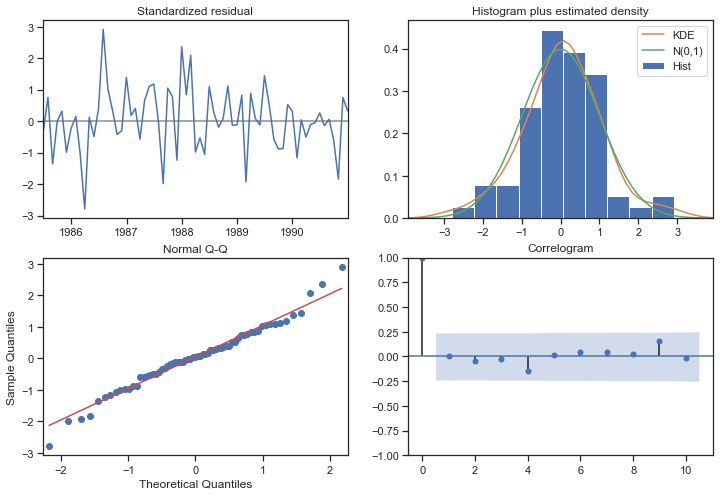

In [259]:
results_auto_SARIMA.plot_diagnostics()
plt.show()

### Predict on the Test Set using this model and evaluate the model :

In [260]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test))

In [261]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

Rose             mean    mean_se  mean_ci_lower  mean_ci_upper
1991-01-31  54.591554  16.836898      21.591841      87.591267
1991-02-28  76.604555  16.896981      43.487081     109.722029
1991-03-31  69.555693  16.992613      36.250782     102.860603
1991-04-30  77.375581  16.972344      44.110399     110.640764
1991-05-31  69.594603  16.951936      36.369418     102.819788

In [262]:
rmse = mean_squared_error(test['Rose'],predicted_auto_SARIMA.predicted_mean,squared=False)
print('Test RMSE:',rmse)

Test RMSE: 29.499462455282714


In [263]:
temp_resultsDf = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['SARIMA(2,1,3)(2,2,3,12)'])


resultsDf12 = pd.concat([resultsDf11,temp_resultsDf])

resultsDf12

Test RMSE
Alpha=0.09,SES                                      36.796249
Alpha=0.157,Beta=0.157:DES                          70.572452
Alpha=0.133,Beta=0.013,Gamma=0:TES - AA             16.447474
Alpha=0.10,Beta=0.04,Gamma=0:TES - AM               17.369488
Alpha=0.1,Beta=0.3,Gamma=0.2:TES - Range            15.893445
Alpha=0.142,Beta=0.011,Gamma=0.0:TES 12 months ...  17.886090
RegressionOnTime                                    15.268955
NaiveModel                                          79.718773
SimpleAverageModel                                  53.460570
2pointTrailingMovingAverage                         11.529278
4pointTrailingMovingAverage                         14.451403
6pointTrailingMovingAverage                         14.566327
9pointTrailingMovingAverage                         14.727630
SARIMA(2,1,3)(2,1,3,6)                              16.741196
SARIMA(3,1,2)(3,1,2,6)                              16.671918
SARIMA(2,1,3)(2,2,3,12)                             29.499462

### ACF and PACF plot of the time series data with the seasonality as 12:

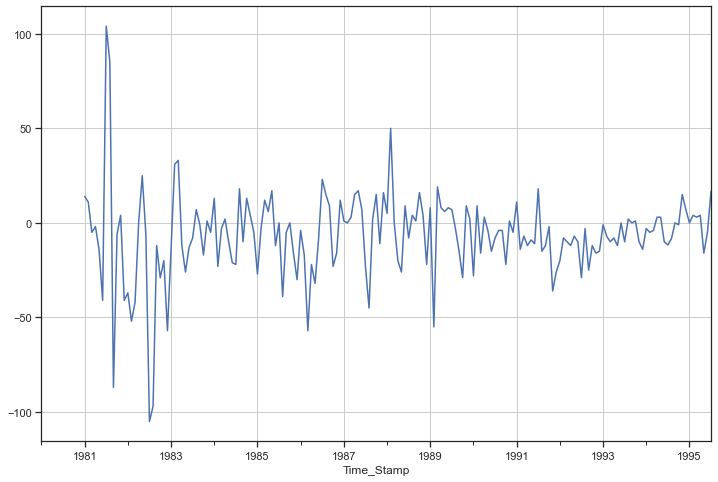

In [264]:
(df['Rose'].diff(12)).plot()
plt.grid();

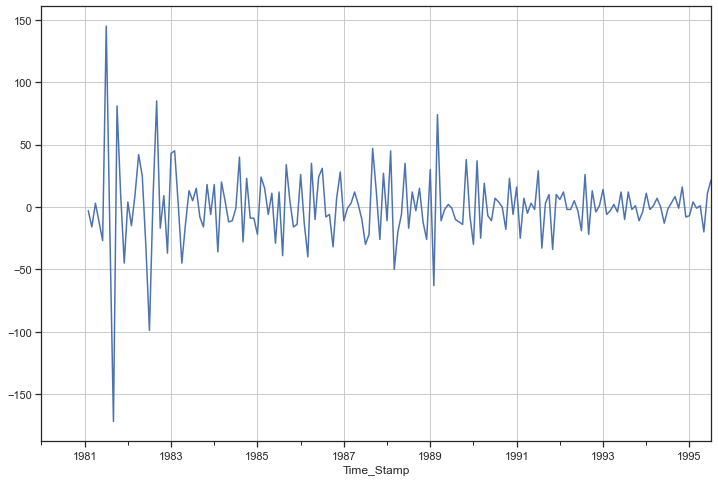

In [265]:
# We can see there is a slight trend present in the data:
# So we take a differencing of first order on the seasonally differenced series.

(df['Rose'].diff(12)).diff().plot()
plt.grid();

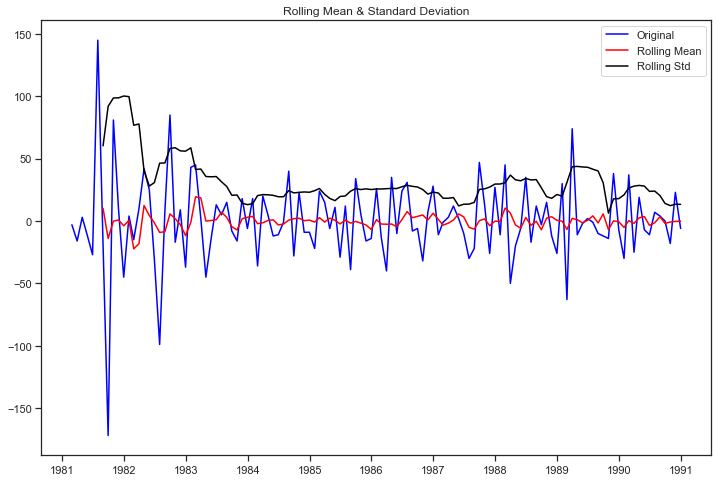

Results of Dickey-Fuller Test:
Test Statistic                  -3.692348
p-value                          0.004222
#Lags Used                      11.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64 



In [266]:
### Checking for the stationarity of the above series:
test_stationarity((train['Rose'].diff(12).dropna()).diff(1).dropna())

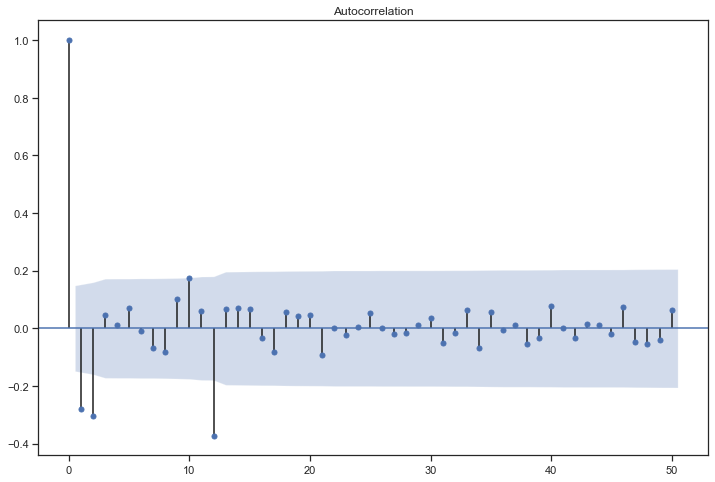

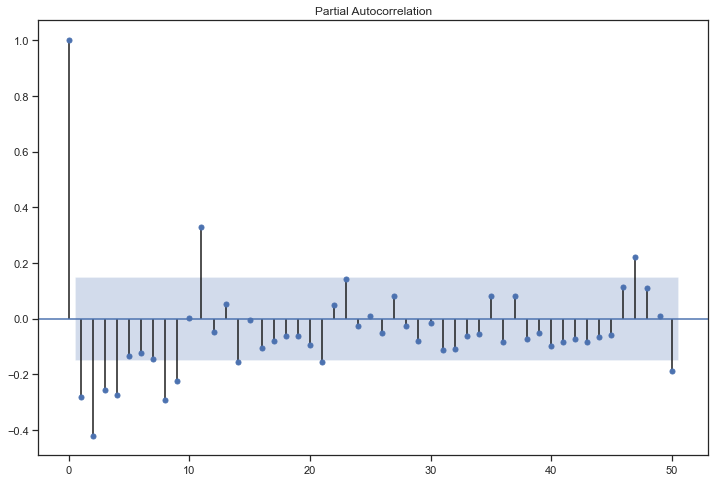

In [267]:
# Checking the new ACF and PACF plots for the new modified time series:

plot_acf((df['Rose'].diff(12).dropna()).diff(1).dropna(),lags=50)
plot_pacf((df['Rose'].diff(12).dropna()).diff(1).dropna(),lags=50);

In [268]:
# Here, P = 2 and Q = 1 
# p = 4 and q = 2
# We have differenced seasonally twice, so D = 2

import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(train['Rose'],
                                order=(4,2,2),
                                seasonal_order=(2, 2, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


                                      SARIMAX Results                                       
Dep. Variable:                                 Rose   No. Observations:                  132
Model:             SARIMAX(4, 2, 2)x(2, 2, [1], 12)   Log Likelihood                -346.496
Date:                              Sat, 22 May 2021   AIC                            712.992
Time:                                      22:45:09   BIC                            736.559
Sample:                                  01-31-1980   HQIC                           722.426
                                       - 12-31-1990                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0478      0.155      0.309      0.758      -0.256       0.351
ar.L2          0.01

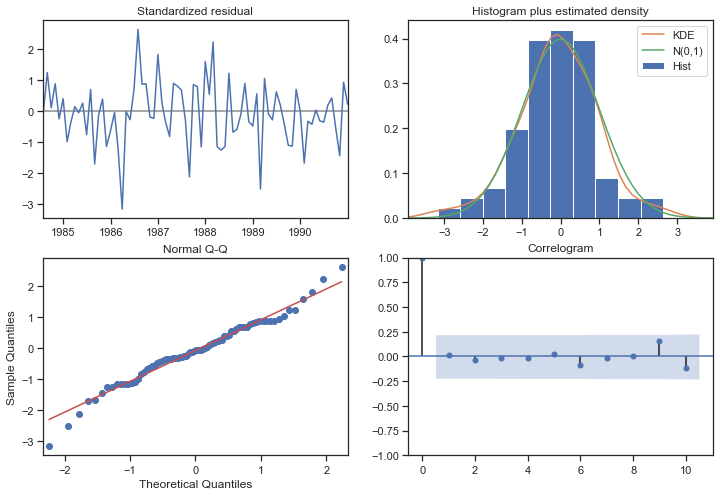

In [269]:
results_manual_SARIMA.plot_diagnostics()
plt.show()

### Predict on the Test Set using this model and evaluate the model

In [270]:
predicted_manual_SARIMA = results_manual_SARIMA.get_forecast(steps=len(test))

In [271]:
predicted_manual_SARIMA.summary_frame(alpha=0.05).head()

Rose             mean    mean_se  mean_ci_lower  mean_ci_upper
1991-01-31  49.530513  18.383064      13.500370      85.560656
1991-02-28  76.830865  18.617936      40.340381     113.321350
1991-03-31  71.180333  18.787848      34.356827     108.003839
1991-04-30  70.091051  18.786646      33.269901     106.912200
1991-05-31  60.268305  18.782615      23.455056      97.081554

In [272]:
rmse = mean_squared_error(test['Rose'],predicted_manual_SARIMA.predicted_mean,squared=False)
print('Test RMSE:',rmse)

Test RMSE: 17.007803493977807


### Table listing of all the models with their respective RMSE values on the test data:

In [273]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['SARIMA(4,2,2)(2,2,1,12)'])


resultsDf13 = pd.concat([resultsDf12,temp_resultsDf])

resultsDf13

Test RMSE
Alpha=0.09,SES                                      36.796249
Alpha=0.157,Beta=0.157:DES                          70.572452
Alpha=0.133,Beta=0.013,Gamma=0:TES - AA             16.447474
Alpha=0.10,Beta=0.04,Gamma=0:TES - AM               17.369488
Alpha=0.1,Beta=0.3,Gamma=0.2:TES - Range            15.893445
Alpha=0.142,Beta=0.011,Gamma=0.0:TES 12 months ...  17.886090
RegressionOnTime                                    15.268955
NaiveModel                                          79.718773
SimpleAverageModel                                  53.460570
2pointTrailingMovingAverage                         11.529278
4pointTrailingMovingAverage                         14.451403
6pointTrailingMovingAverage                         14.566327
9pointTrailingMovingAverage                         14.727630
SARIMA(2,1,3)(2,1,3,6)                              16.741196
SARIMA(3,1,2)(3,1,2,6)                              16.671918
SARIMA(2,1,3)(2,2,3,12)                             29.499462
SARIMA(4,2,2)(2,2,1,12)                             17.007803

In [274]:
### The 2 - point trailing moving average but the moving average model has not been asked in our questions.
### The Regression on Time model has the next lowest RMSE value but does not predict well when plot as we have seen.
#### The next best model is the SARIMA model with seasonality as 6: SARIMA(3,1,2)(3,1,2,6)

### Building the second most optimum model on the full data:

In [275]:
full_data_model = sm.tsa.statespace.SARIMAX(df['Rose'],
                                order=(3,1,2),
                                seasonal_order=(3,1,2,6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


                                     SARIMAX Results                                     
Dep. Variable:                              Rose   No. Observations:                  187
Model:             SARIMAX(3, 1, 2)x(3, 1, 2, 6)   Log Likelihood                -652.643
Date:                           Sat, 22 May 2021   AIC                           1327.287
Time:                                   22:45:39   BIC                           1361.045
Sample:                               01-31-1980   HQIC                          1340.996
                                    - 07-31-1995                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4704      0.250      1.884      0.060      -0.019       0.960
ar.L2         -0.1692      0.097     -1.753

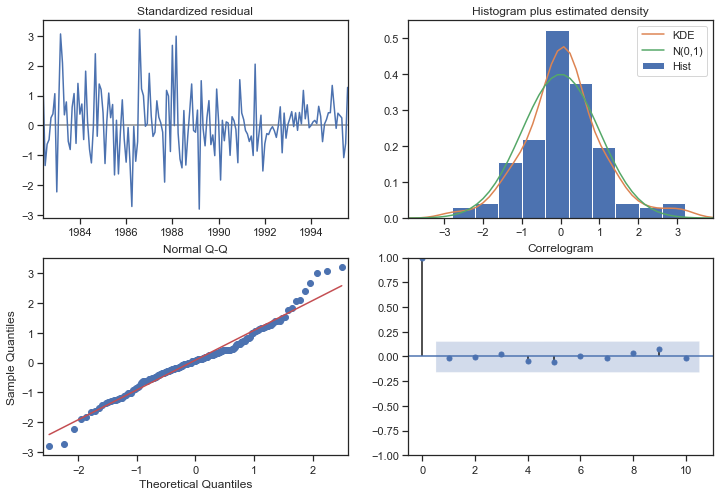

In [276]:
results_full_data_model.plot_diagnostics();

### Evaluate the model on the whole and predict 12 months into the future:

In [277]:
predicted_manual_SARIMA_12full_data = results_full_data_model.get_forecast(steps=12)

In [278]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_12full_data.summary_frame(alpha=0.05)
pred_full_manual_SARIMA_date.head()

Rose             mean    mean_se  mean_ci_lower  mean_ci_upper
1995-08-31  51.258633  14.545997      22.749004      79.768263
1995-09-30  47.309505  14.937278      18.032979      76.586032
1995-10-31  47.605714  15.017177      18.172588      77.038840
1995-11-30  56.064734  15.018832      26.628364      85.501105
1995-12-31  77.988395  15.083295      48.425680     107.551109

In [279]:
rmse = mean_squared_error(df['Rose'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 34.97669040934108


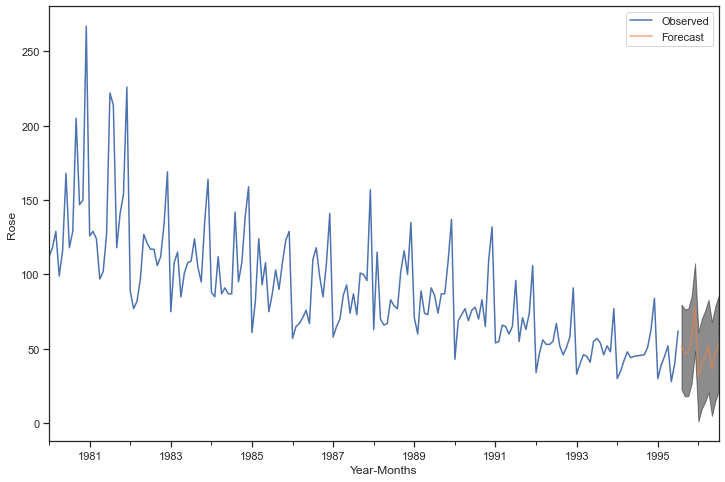

In [280]:
# plot the forecast along with the confidence band

axis = df['Rose'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='k', alpha=.5)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Rose')
plt.legend(loc='best')
plt.show()

### Table listing of all the models with their respetive RMSE:

In [281]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['SARIMA_future data(3,1,2)(3,1,2,6)'])


resultsDf14 = pd.concat([resultsDf13,temp_resultsDf])

resultsDf14

Test RMSE
Alpha=0.09,SES                                      36.796249
Alpha=0.157,Beta=0.157:DES                          70.572452
Alpha=0.133,Beta=0.013,Gamma=0:TES - AA             16.447474
Alpha=0.10,Beta=0.04,Gamma=0:TES - AM               17.369488
Alpha=0.1,Beta=0.3,Gamma=0.2:TES - Range            15.893445
Alpha=0.142,Beta=0.011,Gamma=0.0:TES 12 months ...  17.886090
RegressionOnTime                                    15.268955
NaiveModel                                          79.718773
SimpleAverageModel                                  53.460570
2pointTrailingMovingAverage                         11.529278
4pointTrailingMovingAverage                         14.451403
6pointTrailingMovingAverage                         14.566327
9pointTrailingMovingAverage                         14.727630
SARIMA(2,1,3)(2,1,3,6)                              16.741196
SARIMA(3,1,2)(3,1,2,6)                              16.671918
SARIMA(2,1,3)(2,2,3,12)                             29.499462
SARIMA(4,2,2)(2,2,1,12)                             17.007803
SARIMA_future data(3,1,2)(3,1,2,6)                  34.976690